# Micro Credit Defaulter project

Problem Statement:

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 


In [20]:
import pandas as pd
import numpy as np
df=pd.read_csv("Micro Credit Defaulter project data.csv")

In [21]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,17-06-2016
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,12-06-2016
209590,209591,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,29-07-2016
209591,209592,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,25-07-2016


About The Data:

In [192]:
#Variable	Definition
#label	Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
#msisdn	mobile number of user
#aon	age on cellular network in days
#daily_decr30	Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
#daily_decr90	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
#rental30	Average main account balance over last 30 days
#rental90	Average main account balance over last 90 days
#last_rech_date_ma	Number of days till last recharge of main account
#last_rech_date_da	Number of days till last recharge of data account
#last_rech_amt_ma	Amount of last recharge of main account (in Indonesian Rupiah)
#cnt_ma_rech30	Number of times main account got recharged in last 30 days
#fr_ma_rech30	Frequency of main account recharged in last 30 days
#sumamnt_ma_rech30	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
#medianamnt_ma_rech30	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
#medianmarechprebal30	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
#cnt_ma_rech90	Number of times main account got recharged in last 90 days
#fr_ma_rech90	Frequency of main account recharged in last 90 days
#sumamnt_ma_rech90	Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
#medianamnt_ma_rech90	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
#medianmarechprebal90	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
#cnt_da_rech30	Number of times data account got recharged in last 30 days
#fr_da_rech30	Frequency of data account recharged in last 30 days
#cnt_da_rech90	Number of times data account got recharged in last 90 days
#fr_da_rech90	Frequency of data account recharged in last 90 days
#cnt_loans30	Number of loans taken by user in last 30 days
#amnt_loans30	Total amount of loans taken by user in last 30 days
#maxamnt_loans30	maximum amount of loan taken by the user in last 30 days
#medianamnt_loans30	Median of amounts of loan taken by the user in last 30 days
#cnt_loans90	Number of loans taken by user in last 90 days
#amnt_loans90	Total amount of loans taken by user in last 90 days
#maxamnt_loans90	maximum amount of loan taken by the user in last 90 days
#medianamnt_loans90	Median of amounts of loan taken by the user in last 90 days
#payback30	Average payback time in days over last 30 days
#payback90	Average payback time in days over last 90 days
#pcircle	telecom circle
#pdate	date


In [22]:
#we don't need 'Unnamed: 0' column,we drop it
df=df.drop('Unnamed: 0',axis=1)

In [23]:
#showin all the columns of the DataFrame
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

# Exploretory Data Analysis(EDA)

In [24]:
#import visualisation Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [25]:
#checkig shape of the Dataframe
df.shape

(209593, 36)

our dataframe has 209593 rows and 37 columns.It means we have 209593 user's 37 type of data.

In [26]:
#Checking null values
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [27]:
#percentage of missing values
(df.isnull().sum()/8425*100).sort_values(ascending=False)

label                   0.0
msisdn                  0.0
cnt_da_rech30           0.0
fr_da_rech30            0.0
cnt_da_rech90           0.0
fr_da_rech90            0.0
cnt_loans30             0.0
amnt_loans30            0.0
maxamnt_loans30         0.0
medianamnt_loans30      0.0
cnt_loans90             0.0
amnt_loans90            0.0
maxamnt_loans90         0.0
medianamnt_loans90      0.0
payback30               0.0
payback90               0.0
pcircle                 0.0
medianmarechprebal90    0.0
medianamnt_ma_rech90    0.0
sumamnt_ma_rech90       0.0
last_rech_date_da       0.0
aon                     0.0
daily_decr30            0.0
daily_decr90            0.0
rental30                0.0
rental90                0.0
last_rech_date_ma       0.0
last_rech_amt_ma        0.0
fr_ma_rech90            0.0
cnt_ma_rech30           0.0
fr_ma_rech30            0.0
sumamnt_ma_rech30       0.0
medianamnt_ma_rech30    0.0
medianmarechprebal30    0.0
cnt_ma_rech90           0.0
pdate               

we can see we have no missilng value.

In [28]:
#checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

Three type of value present in the dataFrame                                                      
-object                                             
-float                  
-int

In [29]:
#Describing the Dataset
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,203.000000,...,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


<AxesSubplot:>

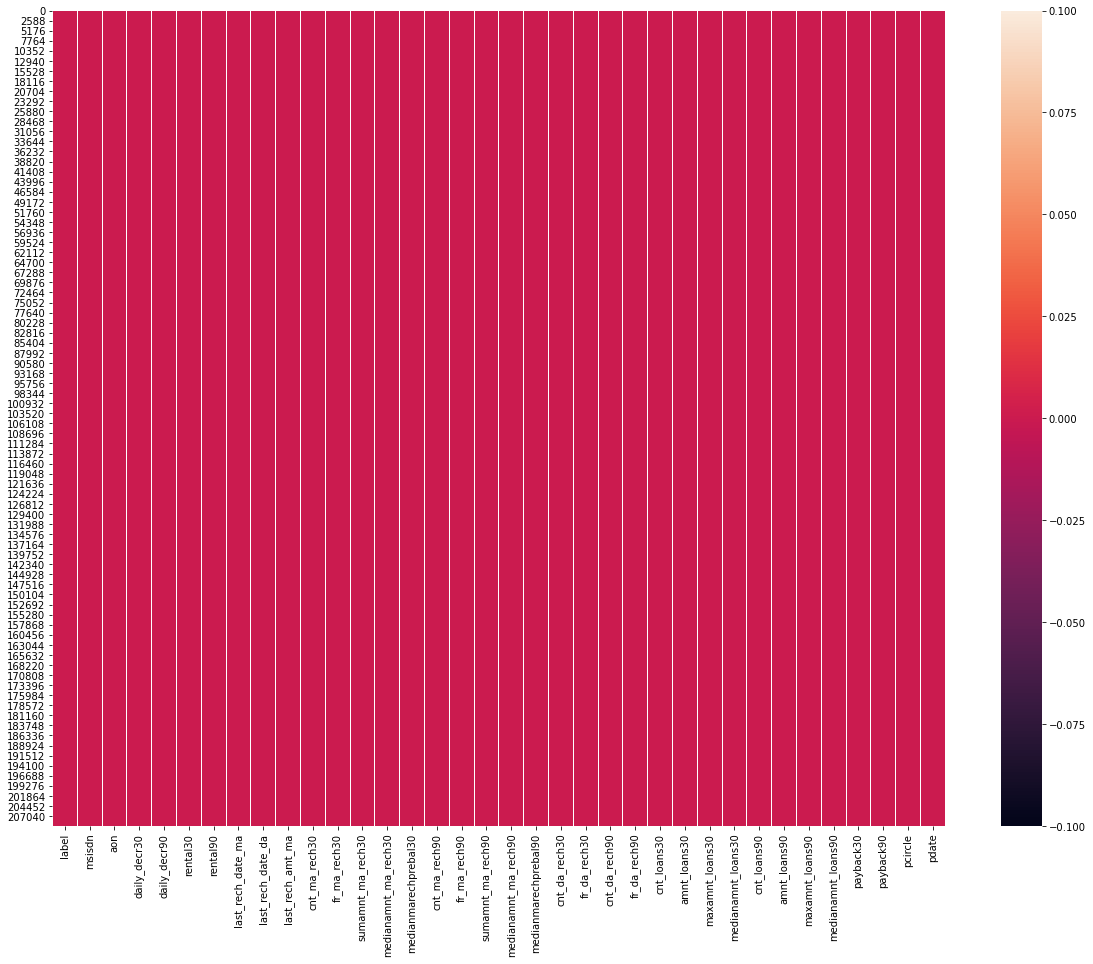

In [30]:
#missing value check using heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.isnull())

Now we divide all the columns into categorical and numerical types

In [31]:
df.dtypes.index

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [32]:
# checking for categorical columns
categorical_columns=[]
index_c=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
        index_c.append(m)
    m=m+1
print(categorical_columns)
print(index_c)

['msisdn', 'pcircle', 'pdate']
[1, 34, 35]


In [33]:
len(categorical_columns)

3

In [34]:
#3 columns data are string type

In [35]:
# now checking for numerical columns
numerical_columns=[]
index_n=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
        index_n.append(m)
    m=m+1
print(numerical_columns)
print(index_n)

['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


In [36]:
len(numerical_columns)

33

In [37]:
#33 columns data are numeric type

# Univariate Analysis:

#Categorical column
i=1 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(7,5))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

we can see many person has same mobile no

column Name: pcircle


UPW    209593
Name: pcircle, dtype: int64
len= 1


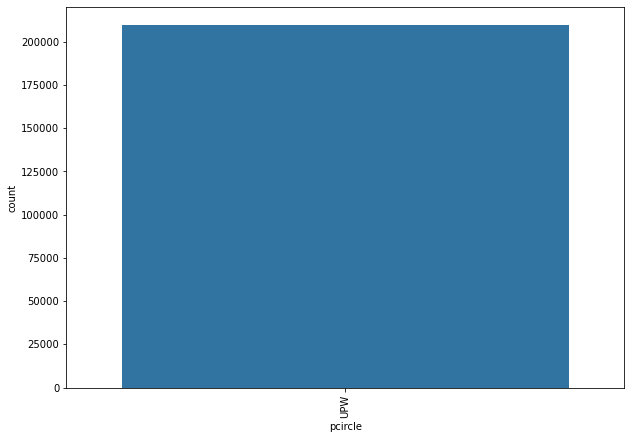

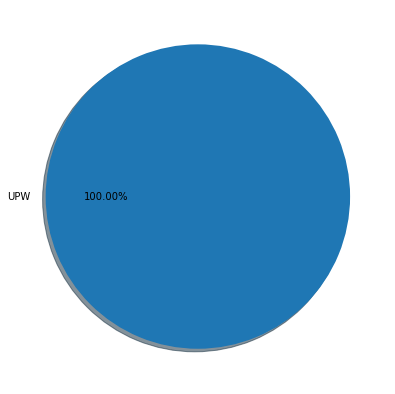



###############################################################################################################################


In [38]:
#Categorical column
i=34 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(10,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.figure(figsize=(10,7))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

We can see in the pcircle column has only One type of data .So we drop this column

In [39]:
#append "pcircle" column in drop_columns list
drop_columns=[] #creat a empty list
drop_columns.append("pcircle")

column Name: pdate


04-07-2016    3150
05-07-2016    3127
07-07-2016    3116
20-06-2016    3099
17-06-2016    3082
              ... 
04-06-2016    1559
18-08-2016    1407
19-08-2016    1132
20-08-2016     788
21-08-2016     324
Name: pdate, Length: 82, dtype: int64
len= 82


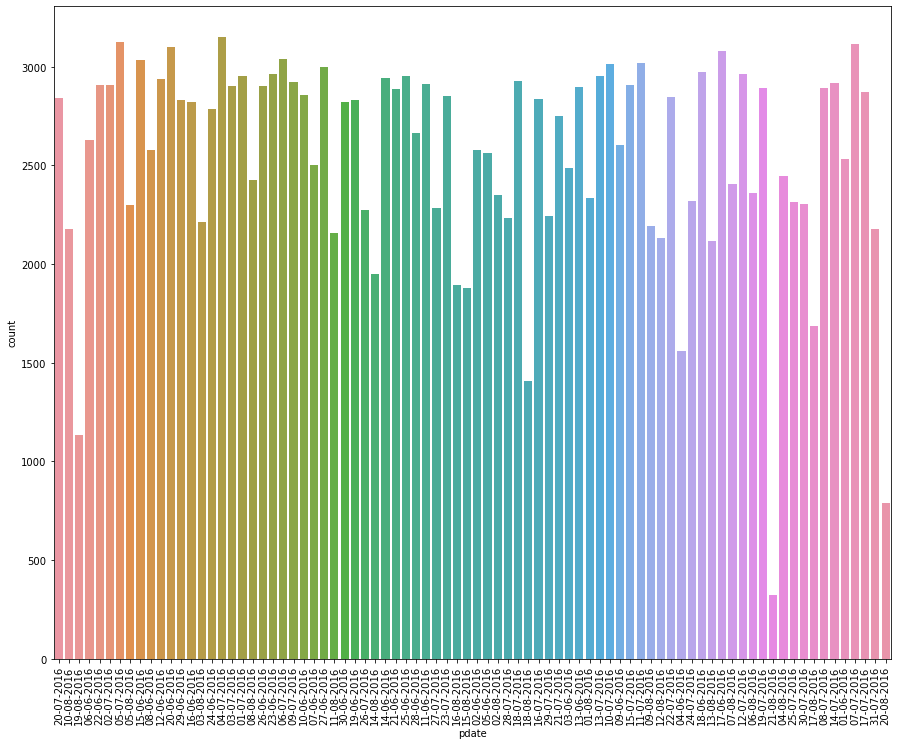

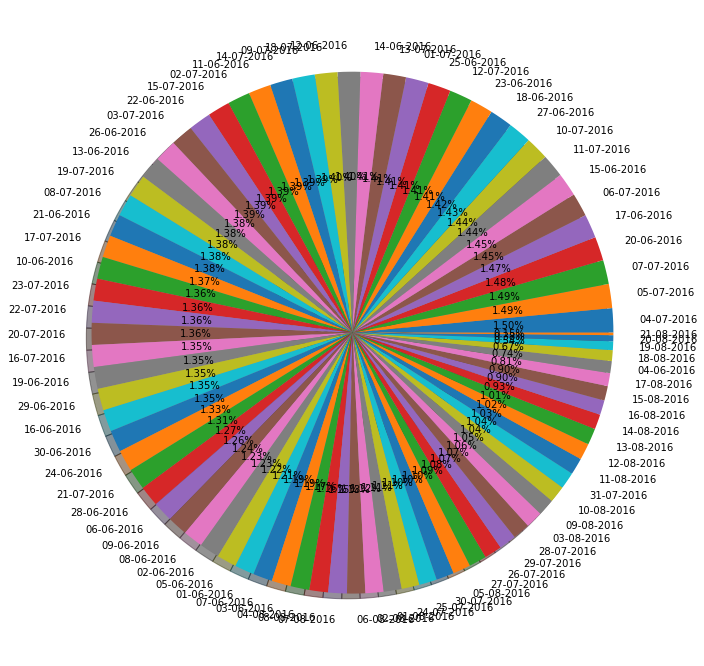



###############################################################################################################################


In [40]:
#Categorical column
i=35 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(15,12))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.figure(figsize=(15,12))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

Year of the all data is 2016.
Now we drop this column and add two columns day and month.

In [41]:
df["Day"]=pd.to_datetime(df["pdate"]).dt.day
df["Month"]=pd.to_datetime(df["pdate"]).dt.month

In [42]:
drop_columns.append("pdate")

In [43]:
df

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,Day,Month
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016,20,7
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016,8,10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016,19,8
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016,6,6
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,2.0,12,6,0.0,1.000000,1.000000,UPW,17-06-2016,17,6
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,3.0,18,6,0.0,1.000000,1.000000,UPW,12-06-2016,6,12
209590,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,6.0,54,12,0.0,4.000000,3.833333,UPW,29-07-2016,29,7
209591,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,...,3.0,24,12,0.0,0.000000,10.500000,UPW,25-07-2016,25,7


In [44]:
#Univariate analysis of Month column

column Name: Month


6     60434
7     57779
8     21080
11     8092
10     8050
12     8028
5      7989
2      7839
1      7824
9      7717
3      7607
4      7154
Name: Month, dtype: int64
len= 12


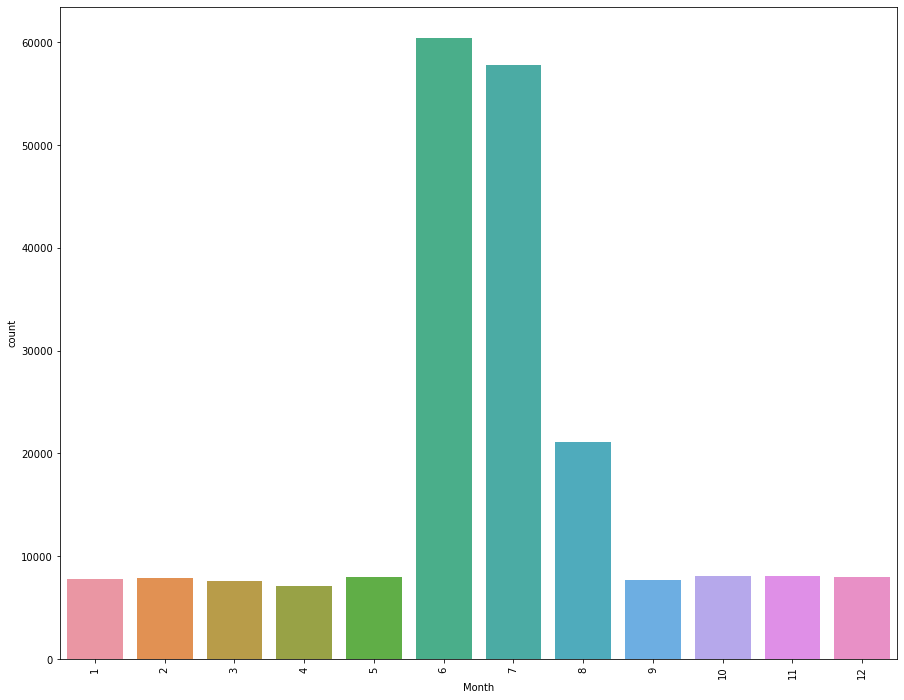

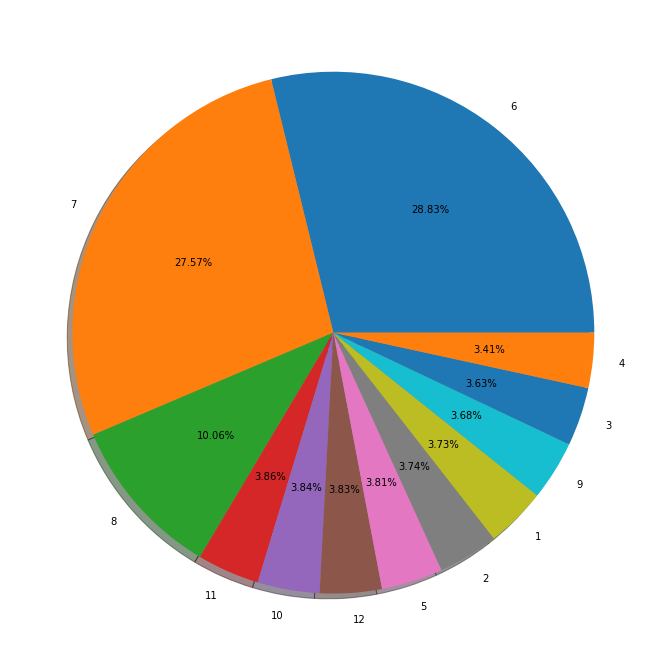



###############################################################################################################################


In [45]:
#Categorical column
i=-1 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(15,12))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.figure(figsize=(15,12))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

We can see that 6th and 7th months have maximum number of customers

column Name: Day


7     36012
6     30750
8     27493
13     7969
15     7820
14     7816
17     7643
16     7556
18     7305
19     6857
20     6729
21     5964
23     5816
22     5753
27     5283
25     5269
26     5174
30     5129
24     5103
29     5077
28     4897
31     2178
Name: Day, dtype: int64
len= 22


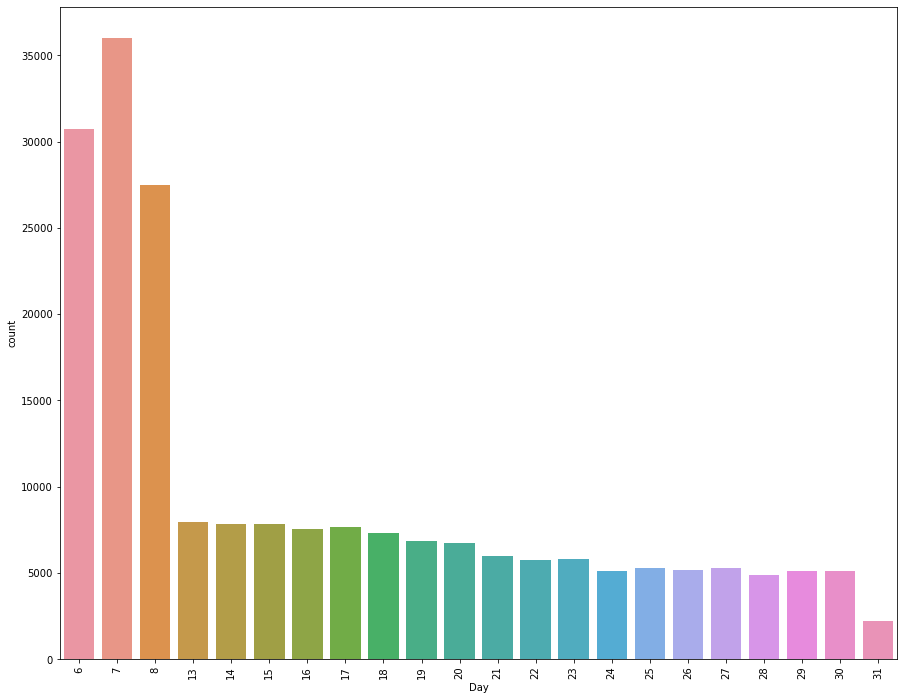

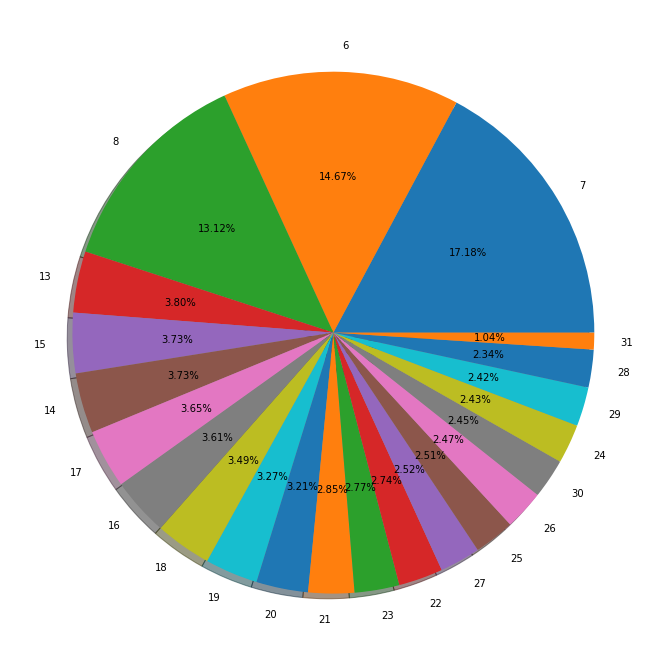



###############################################################################################################################


In [46]:
#Categorical column
i=-2 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(15,12))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.figure(figsize=(15,12))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

In [47]:
# now checking for numerical columns
numerical_columns=[]
index_n=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
        index_n.append(m)
    m=m+1
print(numerical_columns)
print(index_n)

['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90', 'Day', 'Month']
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37]


column Name: label


1    183431
0     26162
Name: label, dtype: int64
len= 2


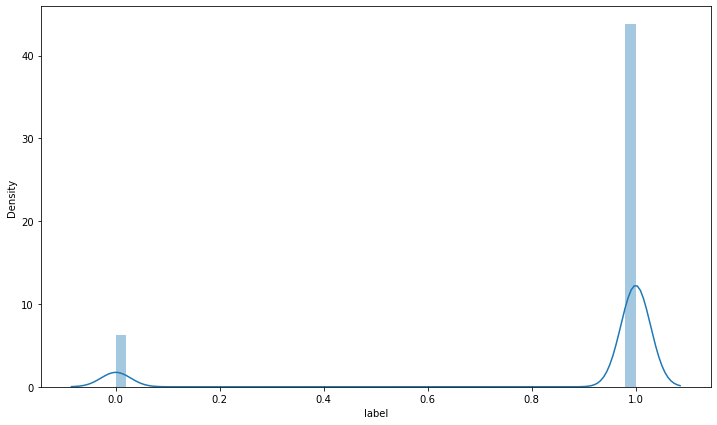



###############################################################################################################################
column Name: aon


95.0000        392
92.0000        362
96.0000        357
99.0000        356
157.0000       349
              ... 
818029.8982      1
674500.0333      1
820053.8309      1
809718.6212      1
904971.1379      1
Name: aon, Length: 4507, dtype: int64
len= 4507


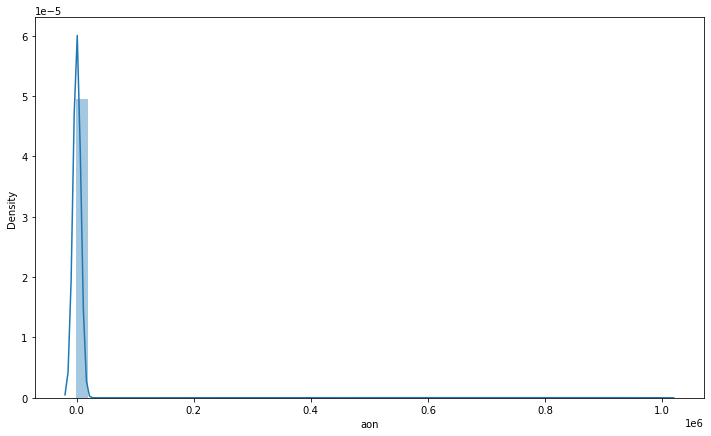



###############################################################################################################################
column Name: daily_decr30


0.000000       4144
500.000000      829
1000.000000     569
700.000000      381
600.000000      354
               ... 
40.676000         1
8.074667          1
278.675000        1
7162.820000       1
738.500000        1
Name: daily_decr30, Length: 146328, dtype: int64
len= 146328


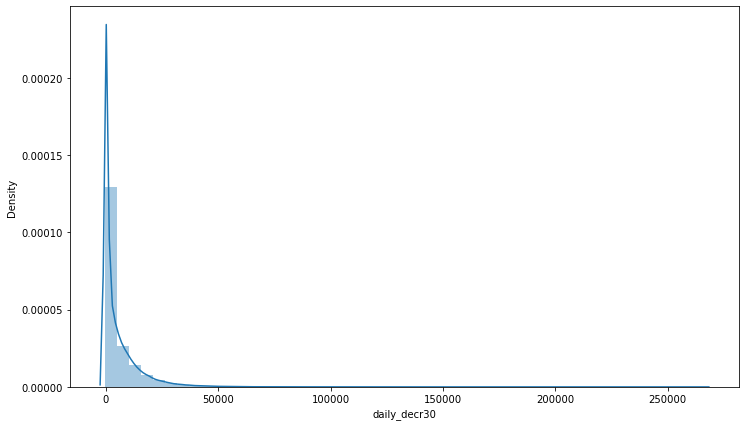



###############################################################################################################################
column Name: daily_decr90


0.000000        4063
500.000000       782
1000.000000      490
700.000000       343
600.000000       319
                ... 
3298.770000        1
150.770000         1
26494.760000       1
9907.150000        1
132.154667         1
Name: daily_decr90, Length: 155483, dtype: int64
len= 155483


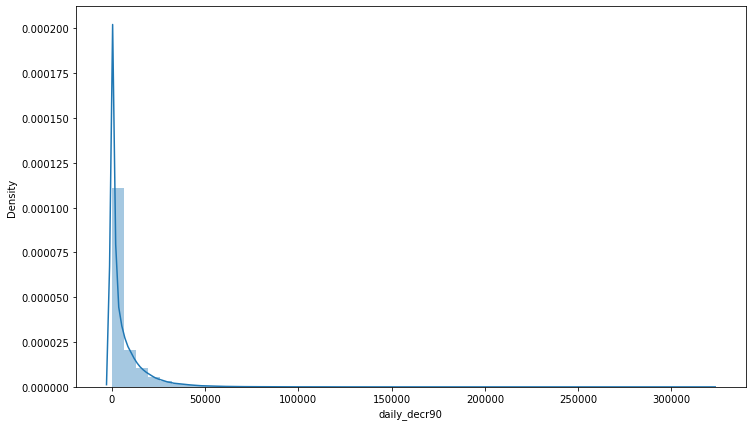



###############################################################################################################################
column Name: rental30


0.00        7566
200.13      1379
99.56       1020
400.26       530
199.12       461
            ... 
795.25         1
4489.39        1
2305.56        1
18748.78       1
677.66         1
Name: rental30, Length: 131338, dtype: int64
len= 131338


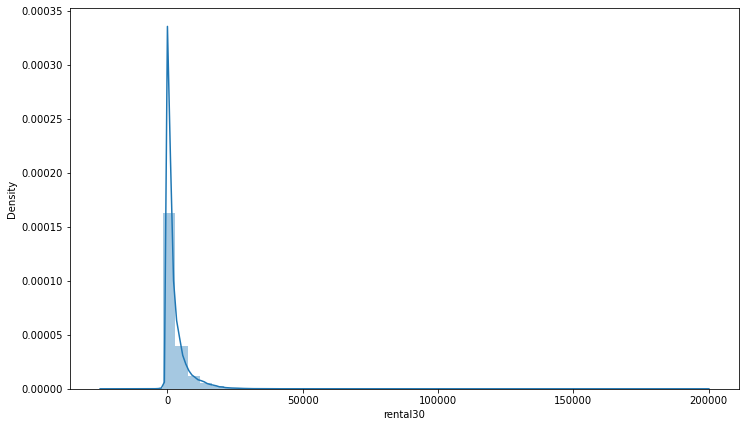



###############################################################################################################################
column Name: rental90


0.00       6918
200.13      913
99.56       767
60.00       691
90.00       685
           ... 
4216.29       1
269.19        1
1800.30       1
1957.12       1
1852.14       1
Name: rental90, Length: 139036, dtype: int64
len= 139036


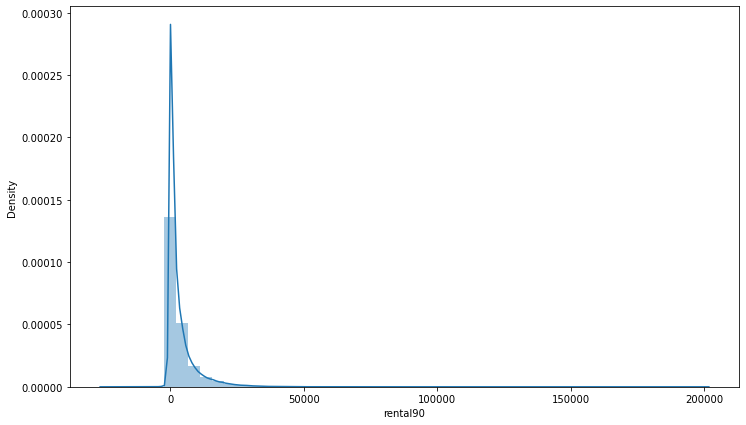



###############################################################################################################################
column Name: last_rech_date_ma


1.0000         47343
2.0000         26665
0.0000         20743
3.0000         19984
4.0000         15452
               ...  
861298.2762        1
590843.1220        1
778889.5814        1
910566.2031        1
859845.6092        1
Name: last_rech_date_ma, Length: 1186, dtype: int64
len= 1186


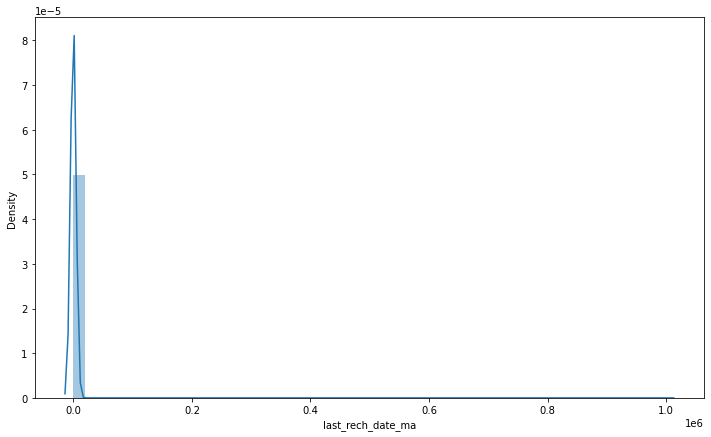



###############################################################################################################################
column Name: last_rech_date_da


0.0000         202861
7.0000            163
8.0000            160
11.0000           149
13.0000           148
                ...  
549941.5164         1
505142.6183         1
701114.3103         1
548364.2386         1
957366.5099         1
Name: last_rech_date_da, Length: 1174, dtype: int64
len= 1174


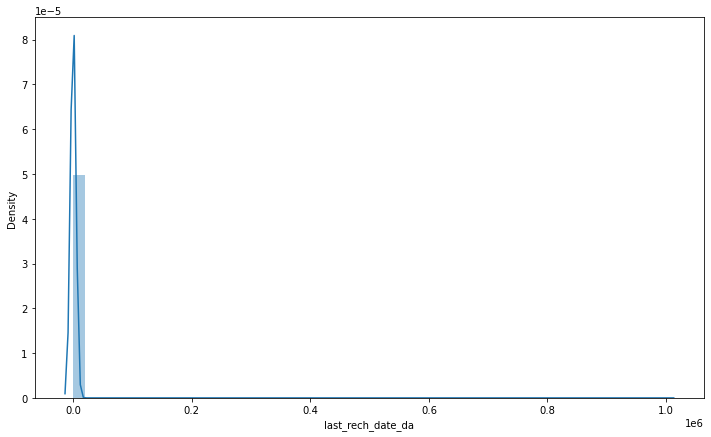



###############################################################################################################################
column Name: last_rech_amt_ma


1539     56297
770      41766
0        20995
773      19523
2309     16113
         ...  
34783        1
4066         1
772          1
19913        1
10454        1
Name: last_rech_amt_ma, Length: 70, dtype: int64
len= 70


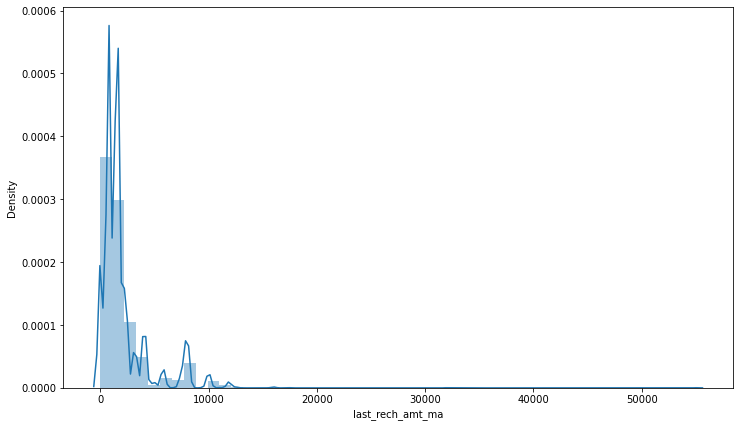



###############################################################################################################################
column Name: cnt_ma_rech30


1      37238
2      31216
0      27979
3      25519
4      20258
       ...  
78         1
84         1
91         1
99         1
115        1
Name: cnt_ma_rech30, Length: 71, dtype: int64
len= 71


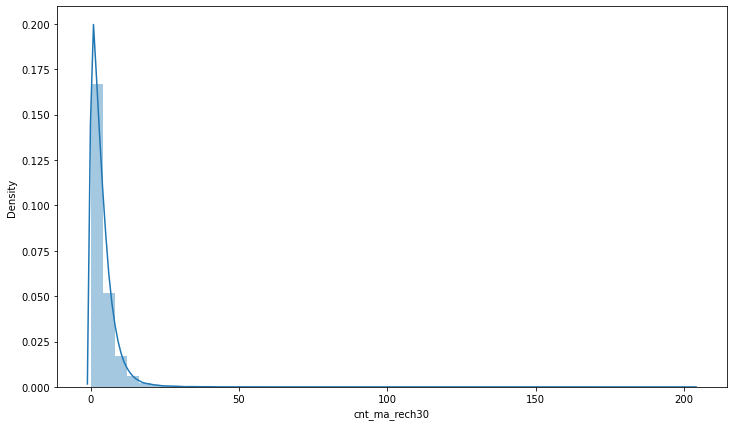



###############################################################################################################################
column Name: fr_ma_rech30


0.0000         78683
1.0000         22370
2.0000         18849
3.0000         14306
4.0000         11194
               ...  
554609.2382        1
752698.8739        1
712268.9660        1
775697.2853        1
675670.9652        1
Name: fr_ma_rech30, Length: 1083, dtype: int64
len= 1083


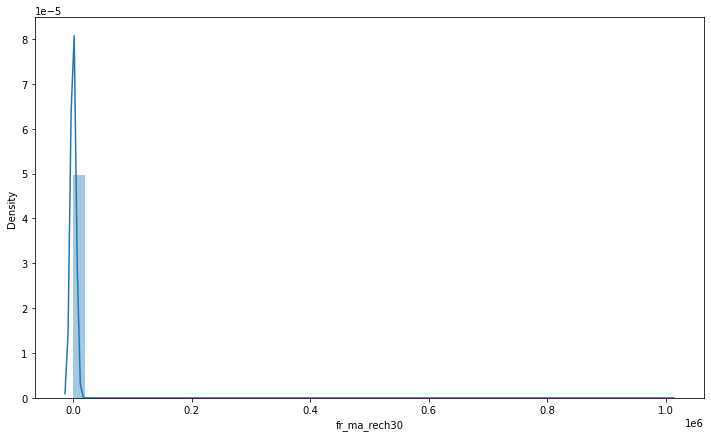



###############################################################################################################################
column Name: sumamnt_ma_rech30


0.0        27979
1539.0      9006
770.0       6040
773.0       4540
2309.0      4509
           ...  
8238.0         1
14196.0        1
42248.0        1
33494.0        1
31801.0        1
Name: sumamnt_ma_rech30, Length: 15141, dtype: int64
len= 15141


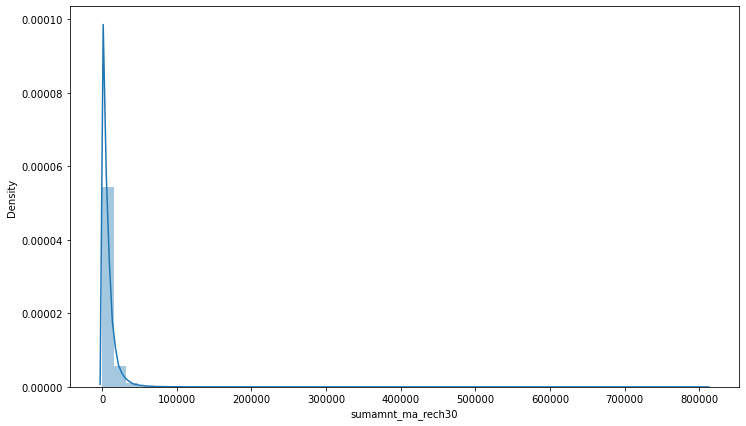



###############################################################################################################################
column Name: medianamnt_ma_rech30


1539.0     47769
770.0      30754
0.0        27979
773.0      22680
2309.0     11177
           ...  
7987.5         1
7907.0         1
21937.0        1
7697.0         1
9589.0         1
Name: medianamnt_ma_rech30, Length: 510, dtype: int64
len= 510


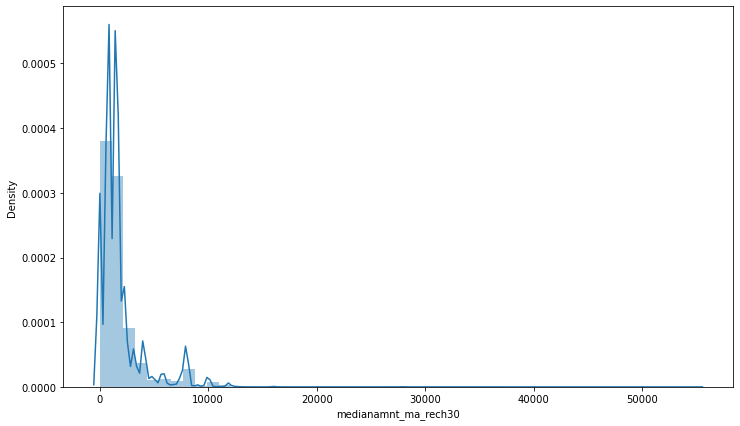



###############################################################################################################################
column Name: medianmarechprebal30


 0.00       30680
 20.00       1108
 19.00       1091
 17.00       1060
 10.00       1045
            ...  
 70.36          1
 613.33         1
-164.47         1
 1152.20        1
 270.46         1
Name: medianmarechprebal30, Length: 23907, dtype: int64
len= 23907


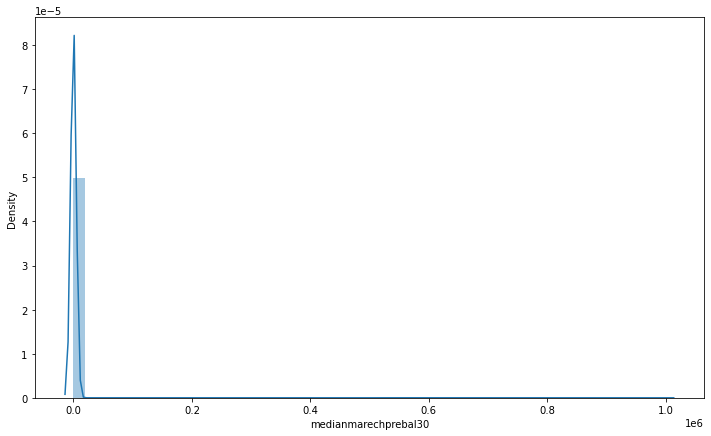



###############################################################################################################################
column Name: cnt_ma_rech90


1      27898
2      24052
0      20950
3      20446
4      17329
       ...  
336        1
151        1
132        1
140        1
127        1
Name: cnt_ma_rech90, Length: 110, dtype: int64
len= 110


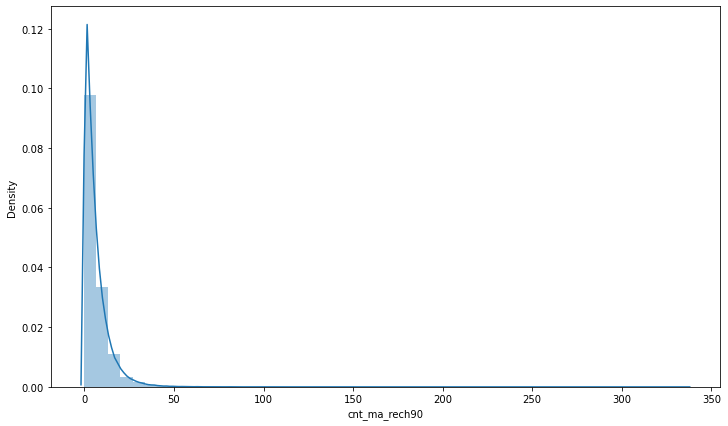



###############################################################################################################################
column Name: fr_ma_rech90


0     65753
1     24373
2     19285
3     13192
4     10021
      ...  
80        7
81        7
88        5
84        4
87        1
Name: fr_ma_rech90, Length: 89, dtype: int64
len= 89


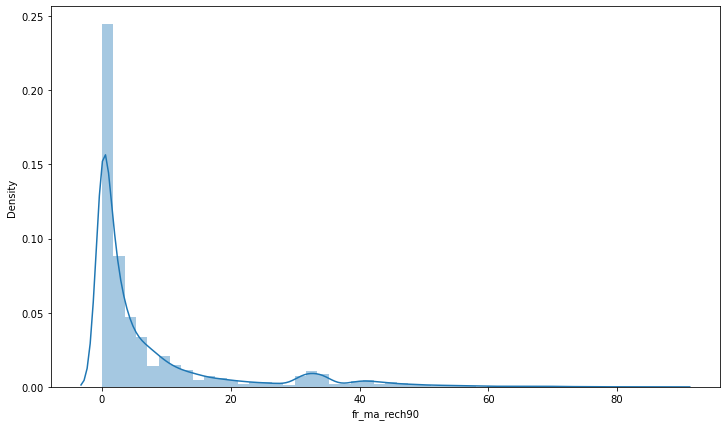



###############################################################################################################################
column Name: sumamnt_ma_rech90


0        20950
1539      5631
773       4177
770       3982
2309      2542
         ...  
18999        1
27187        1
25138        1
37420        1
31920        1
Name: sumamnt_ma_rech90, Length: 31771, dtype: int64
len= 31771


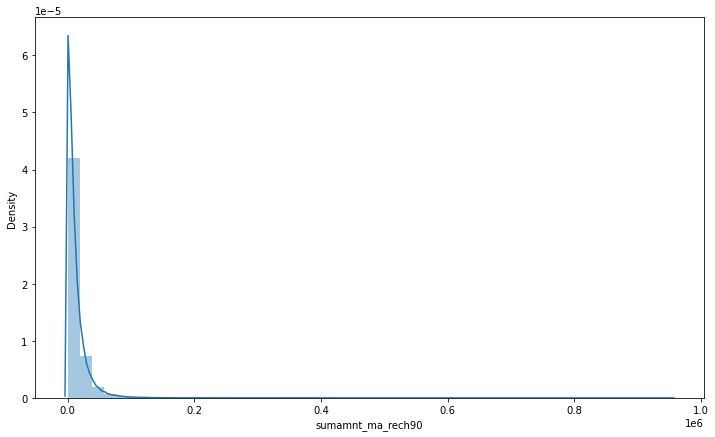



###############################################################################################################################
column Name: medianamnt_ma_rech90


1539.0     45780
773.0      30543
770.0      23844
0.0        20950
2309.0     10665
           ...  
10458.5        1
10963.5        1
2985.5         1
858.0          1
4666.5         1
Name: medianamnt_ma_rech90, Length: 608, dtype: int64
len= 608


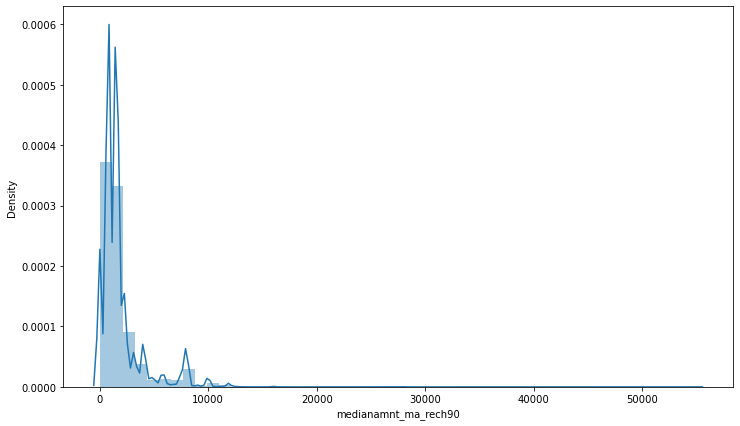



###############################################################################################################################
column Name: medianmarechprebal90


 0.00      23391
 20.00      1265
 19.00      1208
 26.00      1171
 27.00      1166
           ...  
-95.50         1
 426.15        1
 198.47        1
 138.53        1
 738.50        1
Name: medianmarechprebal90, Length: 22694, dtype: int64
len= 22694


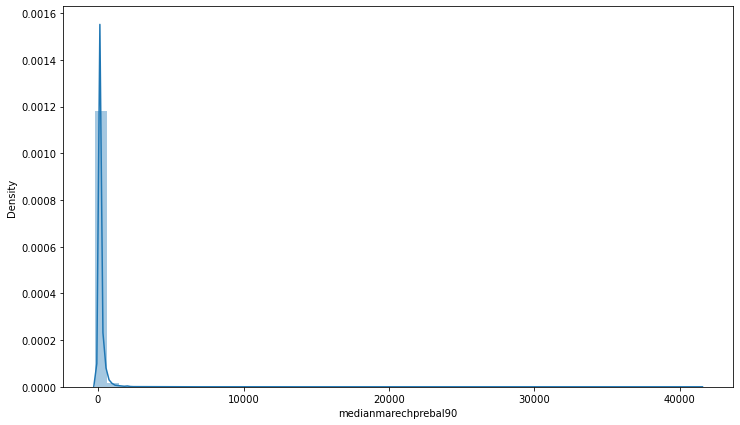



###############################################################################################################################
column Name: cnt_da_rech30


0.00000        205479
1.00000          2331
2.00000           372
3.00000           156
4.00000            86
                ...  
45328.17301         1
53362.91409         1
51980.53032         1
19915.01087         1
74640.92957         1
Name: cnt_da_rech30, Length: 1066, dtype: int64
len= 1066


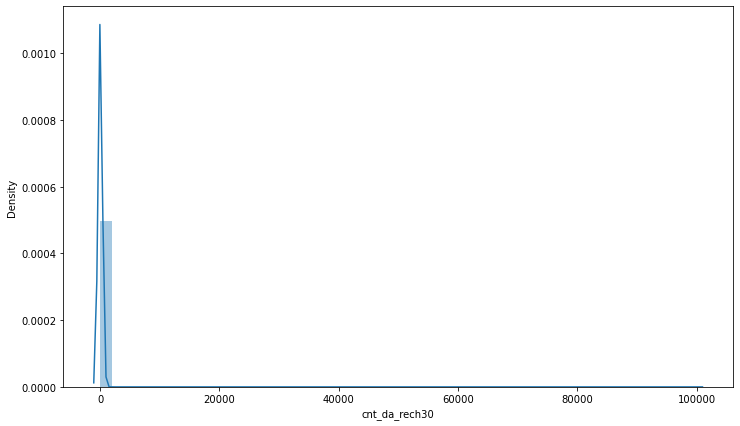



###############################################################################################################################
column Name: fr_da_rech30


0.0000         208014
3.0000             64
1.0000             55
2.0000             51
7.0000             47
                ...  
619236.5316         1
619774.7306         1
533471.1857         1
674706.7724         1
562886.0435         1
Name: fr_da_rech30, Length: 1072, dtype: int64
len= 1072


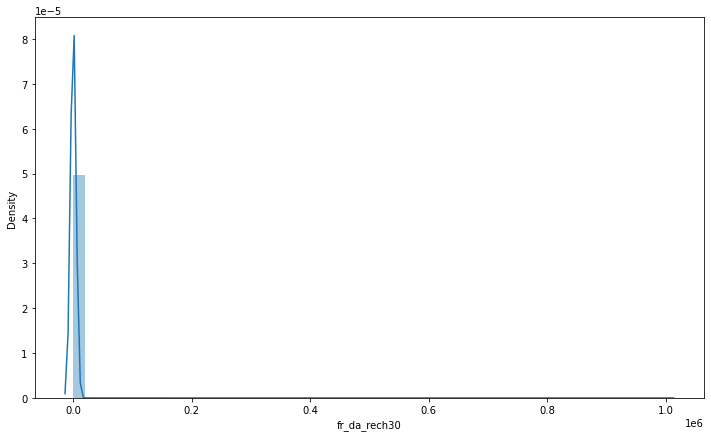



###############################################################################################################################
column Name: cnt_da_rech90


0     204226
1       4173
2        556
3        227
4        150
5         74
6         49
7         36
8         30
9         18
14        10
11         7
12         7
13         6
10         6
16         4
18         3
15         2
17         1
19         1
20         1
22         1
25         1
27         1
28         1
30         1
38         1
Name: cnt_da_rech90, dtype: int64
len= 27


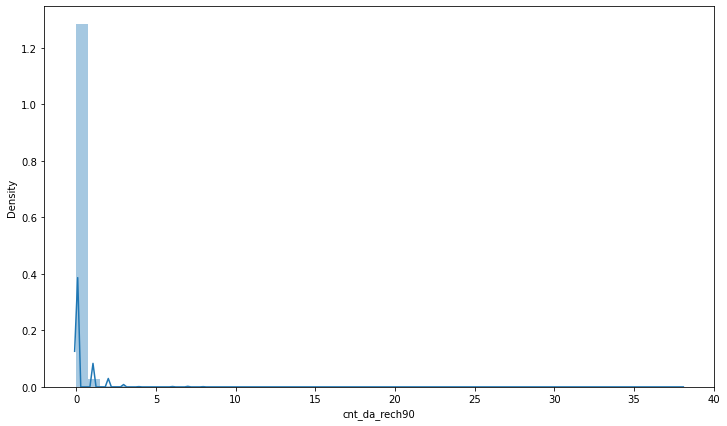



###############################################################################################################################
column Name: fr_da_rech90


0     208728
3         78
1         66
2         66
4         56
7         55
6         52
5         45
8         44
10        33
9         32
14        32
11        30
12        27
19        22
28        19
13        17
15        17
18        16
29        15
17        14
16        14
22        11
25        11
21        10
20         9
24         8
27         8
32         8
26         7
30         7
31         6
34         5
37         5
23         5
57         3
35         2
41         2
33         1
39         1
42         1
43         1
46         1
55         1
56         1
64         1
Name: fr_da_rech90, dtype: int64
len= 46


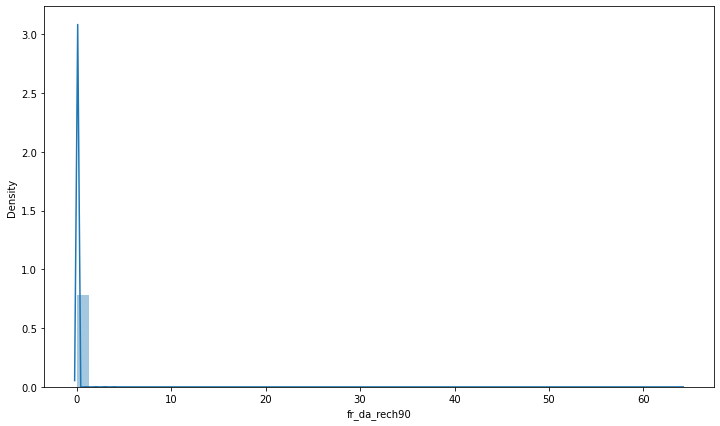



###############################################################################################################################
column Name: cnt_loans30


1     83432
2     42665
3     27050
4     17499
5     11673
6      7773
7      5041
8      3384
0      3259
9      2273
10     1571
11     1143
12      793
13      547
14      383
15      270
16      213
17      164
18       98
19       77
20       54
21       45
22       42
23       38
25       19
26       17
27       15
24       13
29        9
31        8
28        7
32        4
30        4
33        3
38        2
35        1
36        1
41        1
44        1
50        1
Name: cnt_loans30, dtype: int64
len= 40


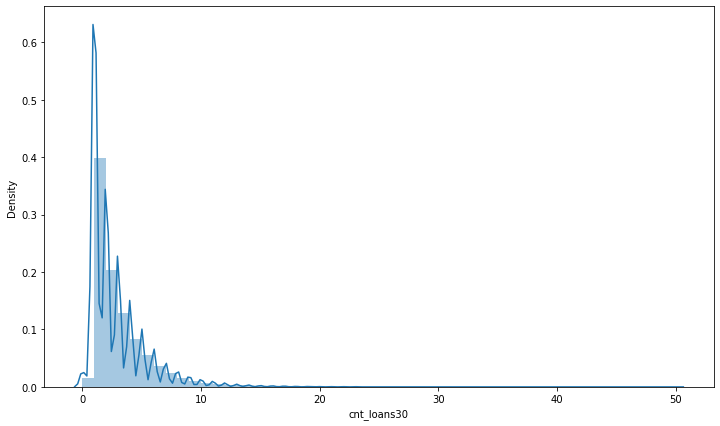



###############################################################################################################################
column Name: amnt_loans30


6      76620
12     44384
18     26379
24     18403
30     11999
36      8559
42      5580
48      3994
0       3259
54      2660
60      2043
66      1402
72      1101
78       742
84       580
90       394
96       333
102      252
108      182
114      135
120      119
132       92
126       80
138       64
156       34
150       30
144       30
162       29
168       20
174       17
186       15
180       13
192        7
198        6
210        4
216        4
228        4
252        4
222        3
258        3
264        3
276        3
204        2
240        2
306        1
300        1
246        1
270        1
Name: amnt_loans30, dtype: int64
len= 48


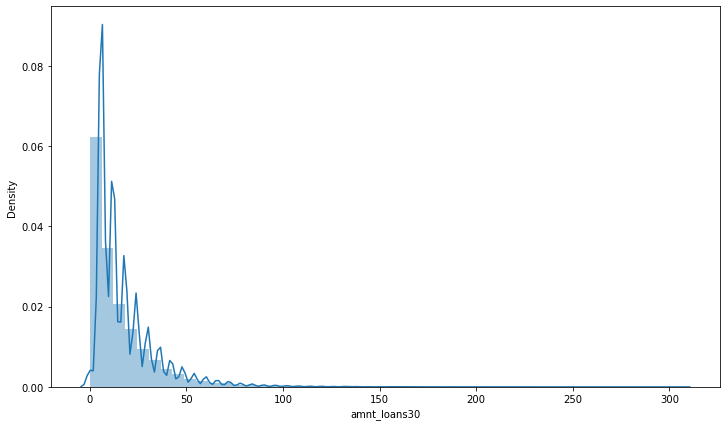



###############################################################################################################################
column Name: maxamnt_loans30


6.00000        179193
12.00000        26109
0.00000          3244
42638.64832         1
43961.22397         1
                ...  
95609.88240         1
18728.01220         1
64645.93468         1
17347.61221         1
71036.31091         1
Name: maxamnt_loans30, Length: 1050, dtype: int64
len= 1050


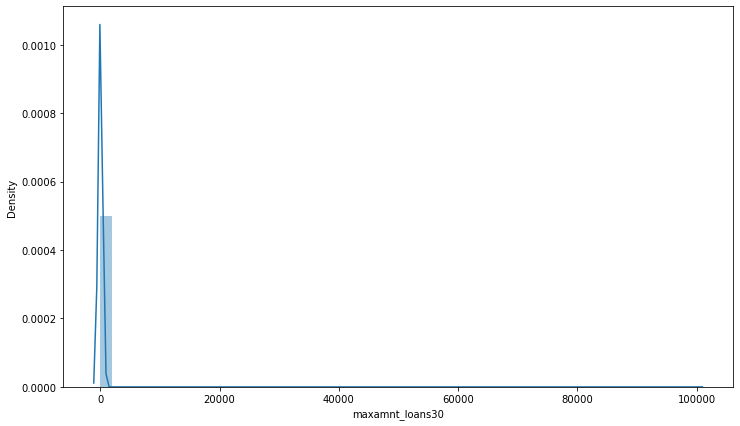



###############################################################################################################################
column Name: medianamnt_loans30


0.0    195445
1.0      7149
0.5      6538
2.0       420
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64
len= 6


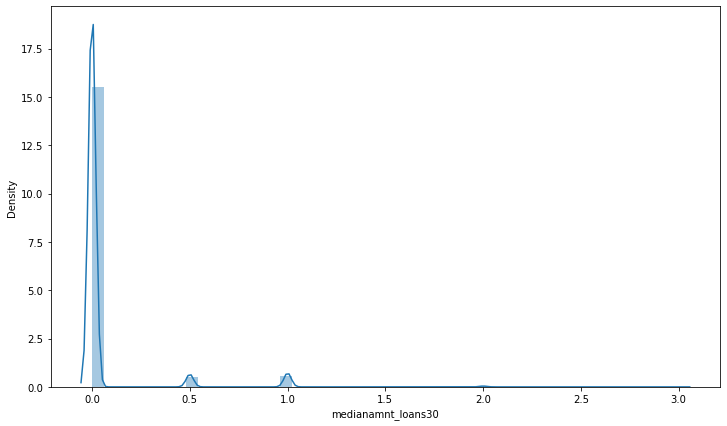



###############################################################################################################################
column Name: cnt_loans90


1.000000       73862
2.000000       37286
3.000000       23986
4.000000       16761
5.000000       12331
               ...  
3144.458867        1
3965.394666        1
4037.543259        1
3784.696928        1
1557.843845        1
Name: cnt_loans90, Length: 1110, dtype: int64
len= 1110


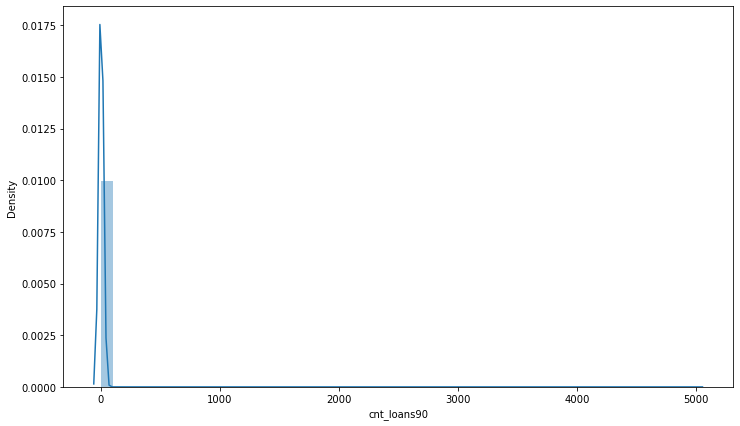



###############################################################################################################################
column Name: amnt_loans90


6      69131
12     38908
18     23867
24     17216
30     12503
       ...  
360        1
438        1
372        1
426        1
402        1
Name: amnt_loans90, Length: 69, dtype: int64
len= 69


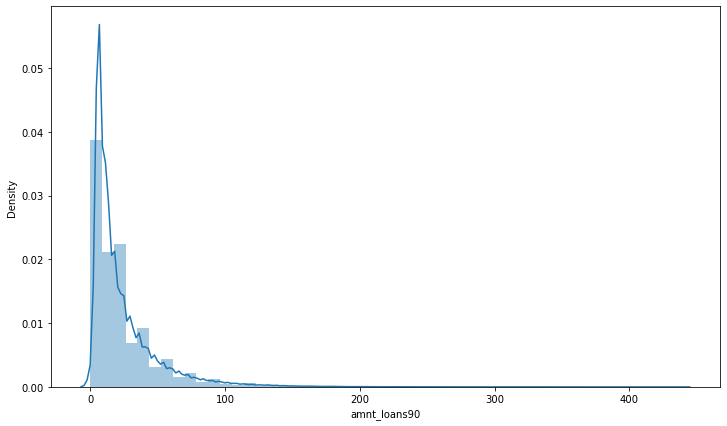



###############################################################################################################################
column Name: maxamnt_loans90


6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64
len= 3


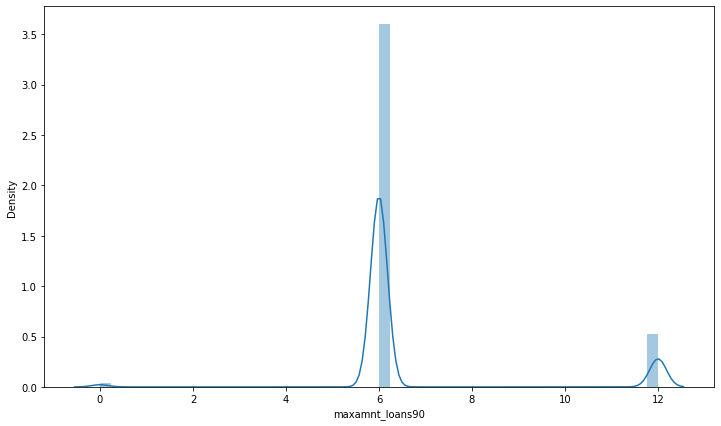



###############################################################################################################################
column Name: medianamnt_loans90


0.0    197424
1.0      6172
0.5      5668
2.0       307
1.5        19
3.0         3
Name: medianamnt_loans90, dtype: int64
len= 6


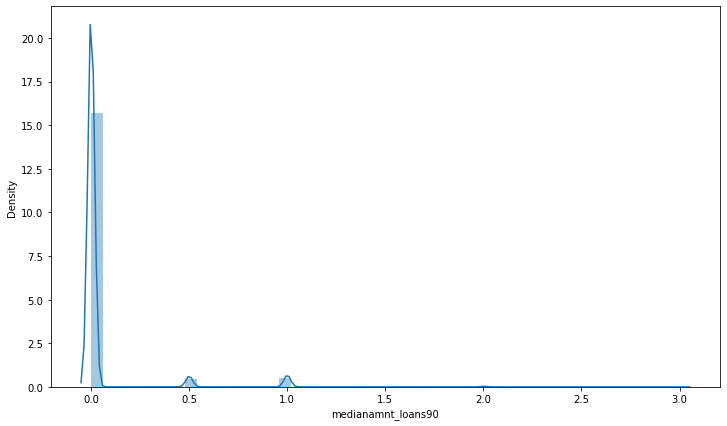



###############################################################################################################################
column Name: payback30


0.000000      106712
2.000000        5601
3.000000        5023
4.000000        3931
2.500000        3518
               ...  
3.578947           1
62.800000          1
131.000000         1
32.400000          1
1.578947           1
Name: payback30, Length: 1363, dtype: int64
len= 1363


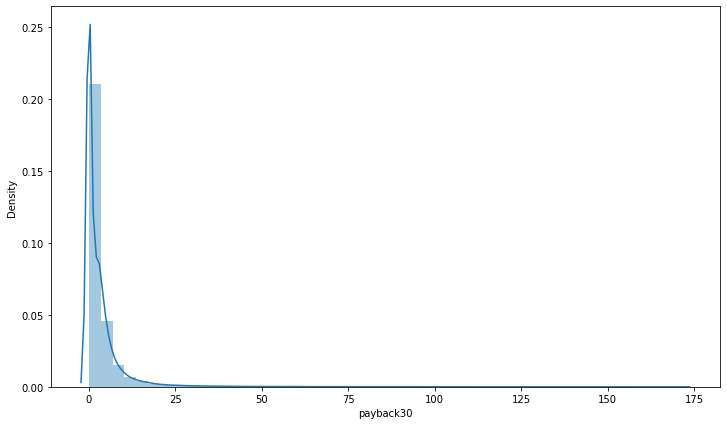



###############################################################################################################################
column Name: payback90


0.000000     95699
2.000000      4982
3.000000      4437
4.000000      3610
2.500000      3015
             ...  
6.117647         1
1.394737         1
7.350000         1
3.192308         1
14.222222        1
Name: payback90, Length: 2381, dtype: int64
len= 2381


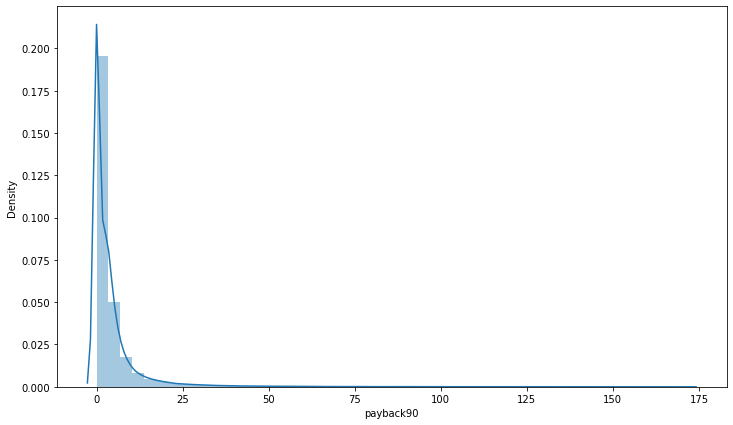



###############################################################################################################################
column Name: Day


7     36012
6     30750
8     27493
13     7969
15     7820
14     7816
17     7643
16     7556
18     7305
19     6857
20     6729
21     5964
23     5816
22     5753
27     5283
25     5269
26     5174
30     5129
24     5103
29     5077
28     4897
31     2178
Name: Day, dtype: int64
len= 22


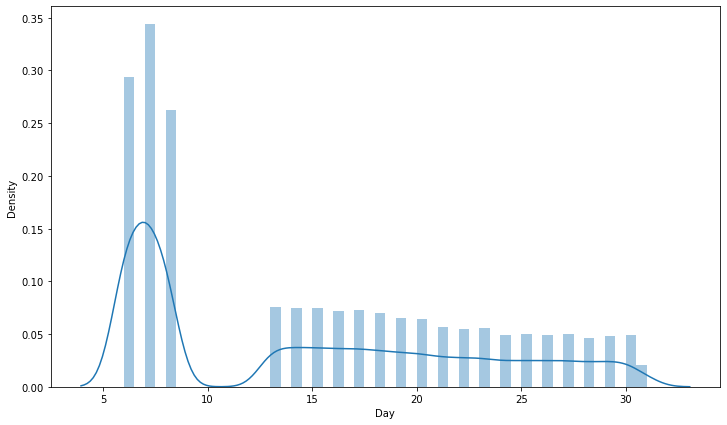



###############################################################################################################################
column Name: Month


6     60434
7     57779
8     21080
11     8092
10     8050
12     8028
5      7989
2      7839
1      7824
9      7717
3      7607
4      7154
Name: Month, dtype: int64
len= 12


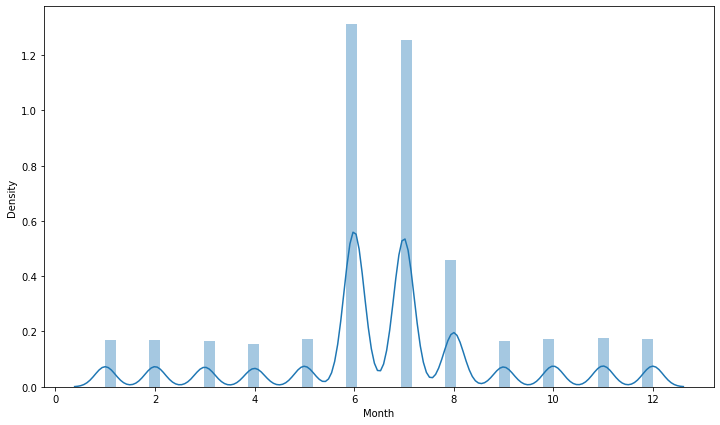



###############################################################################################################################


In [48]:
#Numerical Column
for i in index_n:
    print("column Name:",df.columns[i])
    print("\n")
    print(df[df.columns[i]].value_counts())
    print("len=",len(df[df.columns[i]].value_counts()))
    plt.figure(figsize=(12,7))
    sns.distplot(df[df.columns[i]])
    plt.show()
    print('\n')
    print("#"*127)

we can see our target column, label has present posetive skewness and data of this column is imbalanceed.      
if we deeply noticed all the graphs, we can see most of the numerical columns has positive skewness.

# Bivariate Analysis:

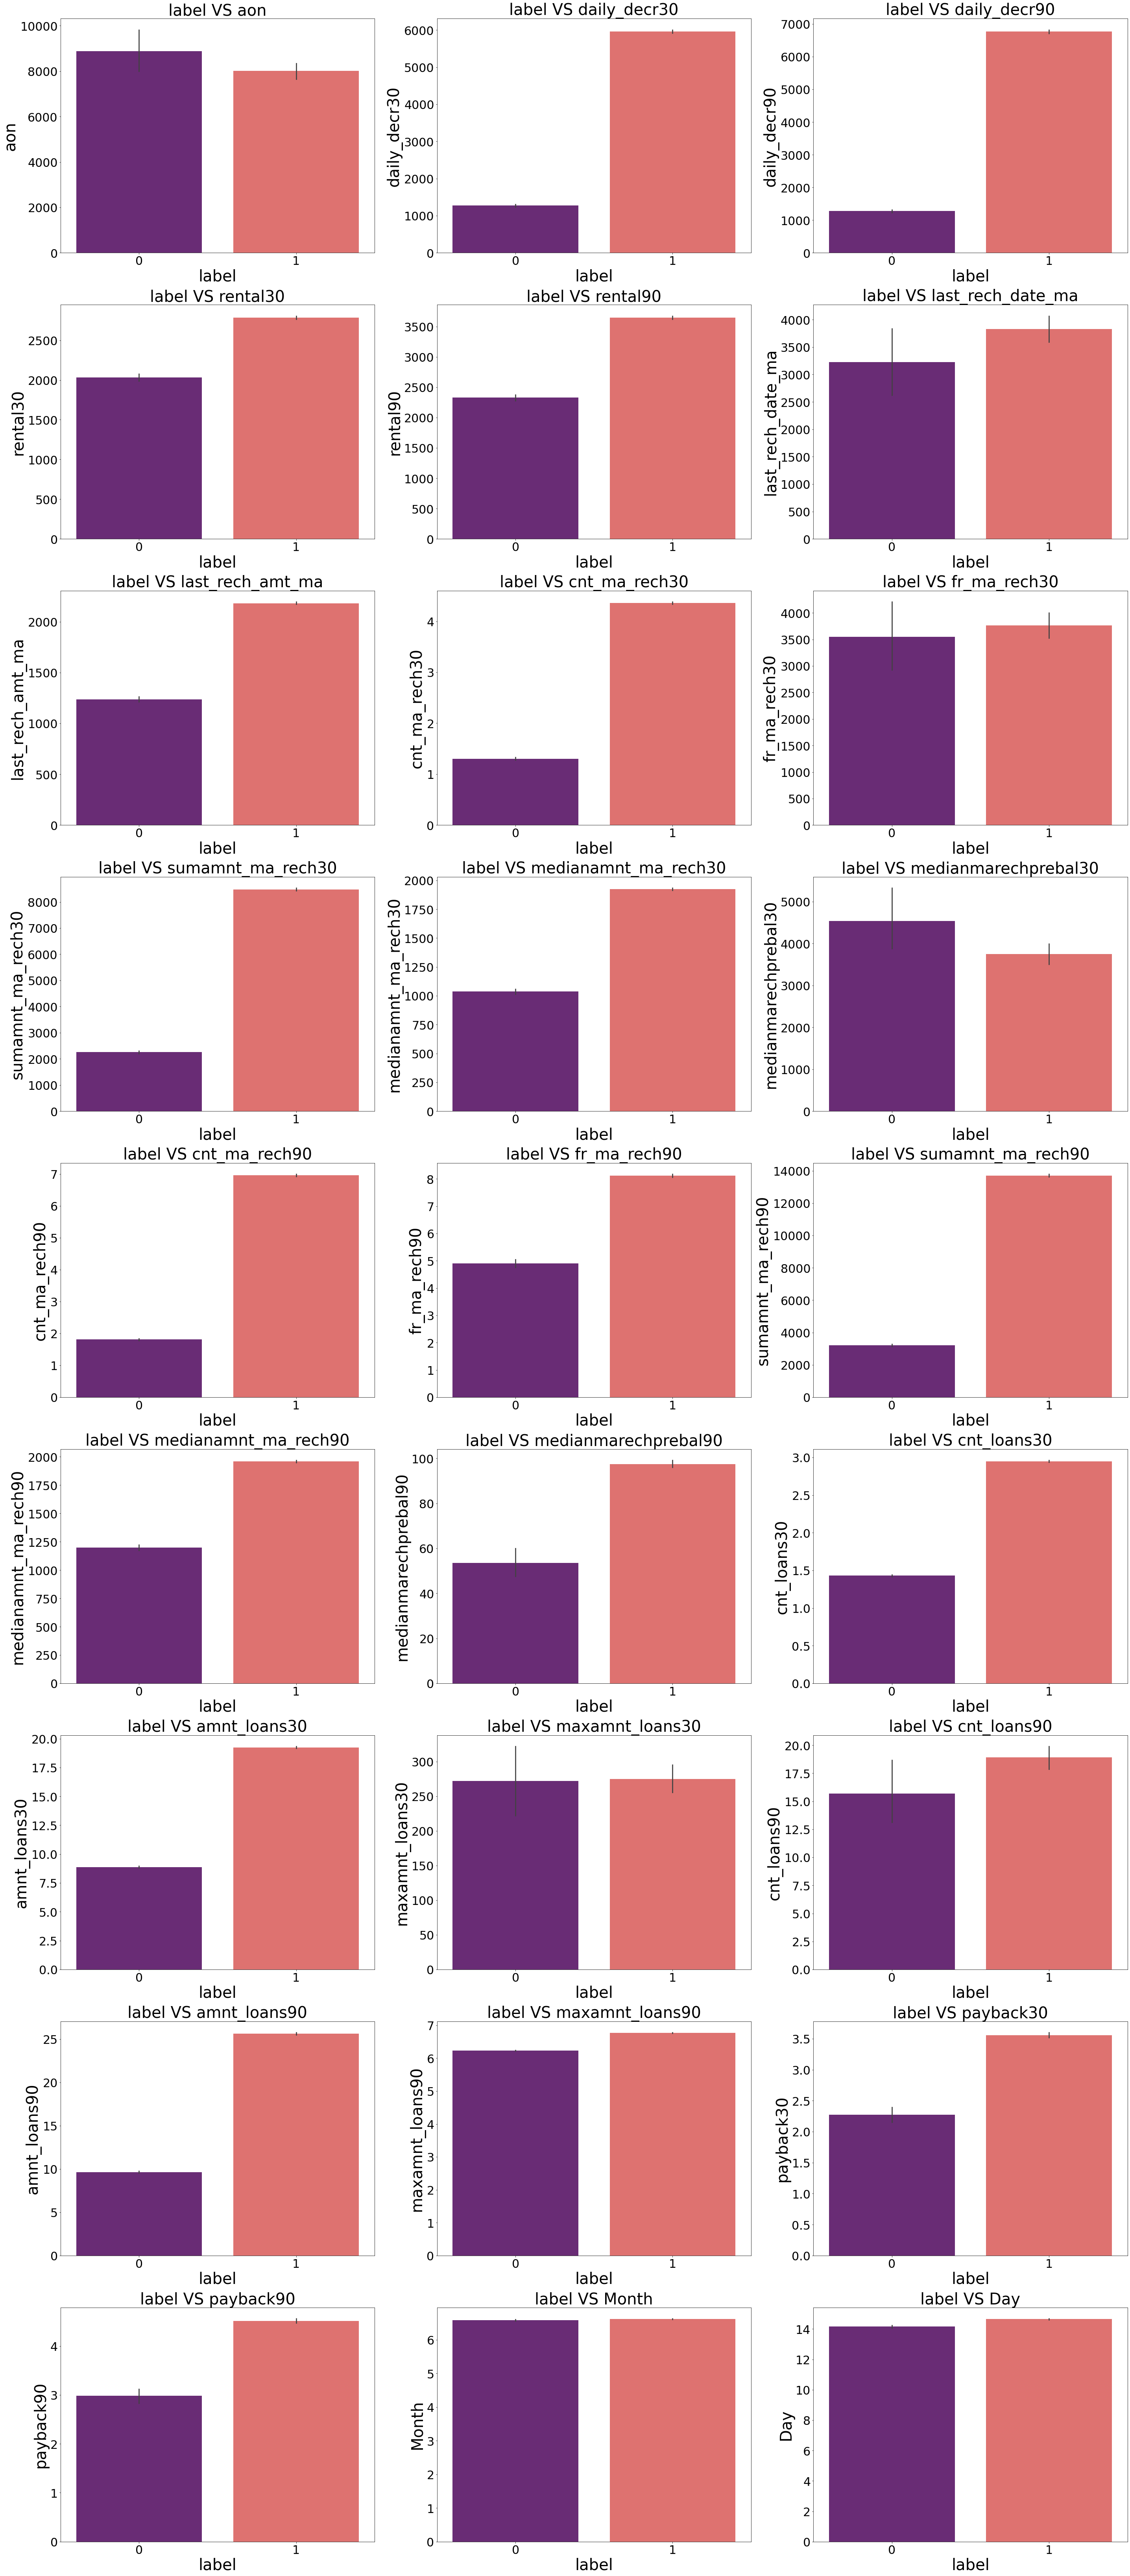

In [73]:
# Relation between target and other column :

col=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'Month', 'Day']

plt.figure(figsize=(40,100))
for i in range(len(col)):
    plt.subplot(10,3,i+1)
    sns.barplot(x=df['label'],y=df[col[i]],palette='magma')
    plt.title(f"label VS {col[i]}",fontsize=40)
    plt.xticks(fontsize=30)  
    plt.yticks(fontsize=30)
    plt.xlabel('label',fontsize = 40)
    plt.ylabel(col[i],fontsize = 40)
    plt.tight_layout()

# Multivariate Analysis:

In [ ]:
sns.pairplot(df)

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable 'label'. Here we can observe the relation between the features and label. Most of features are highly correlated with each other. Some of the features have outliers and skewness , will remove them later.

drop that columns which stored in "drop_columns" list

In [49]:
drop_columns

['pcircle', 'pdate']

In [50]:
df=df.drop(drop_columns,axis=1)

In [51]:
df.head(5)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6


In [52]:
#describing the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755200
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377700
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809400
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


In [53]:
#Checking Correlation
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,0.020168,0.005093
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,0.000259,0.000906
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,0.024892,0.101704
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,-0.009150,0.122772
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,0.050964,0.073416
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,0.019945,0.099160
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,0.000758,-0.000924
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,0.000660,-0.000530
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,0.032715,0.023358
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362,0.080003,0.024767


<AxesSubplot:>

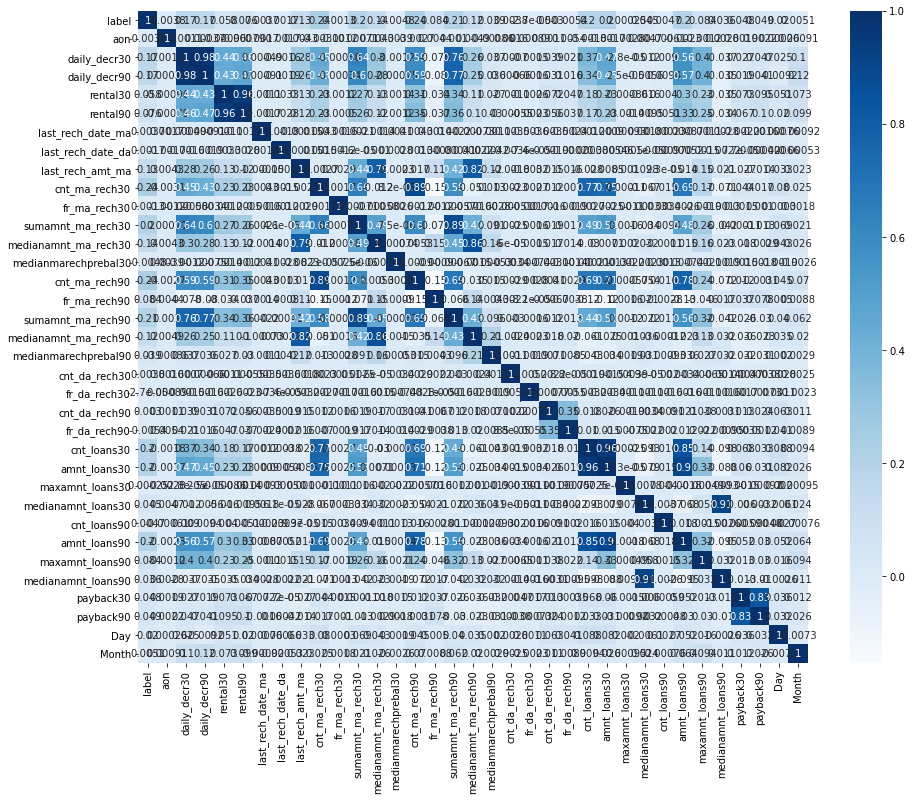

In [54]:
#checking corrleation using heatmap
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [55]:
#Checking Skewness
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

# Checking Outliers:

In [56]:
# now checking for numerical columns
numerical_columns=[]
index_n=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
        index_n.append(m)
    m=m+1
print(numerical_columns)
print(index_n)

['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90', 'Day', 'Month']
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


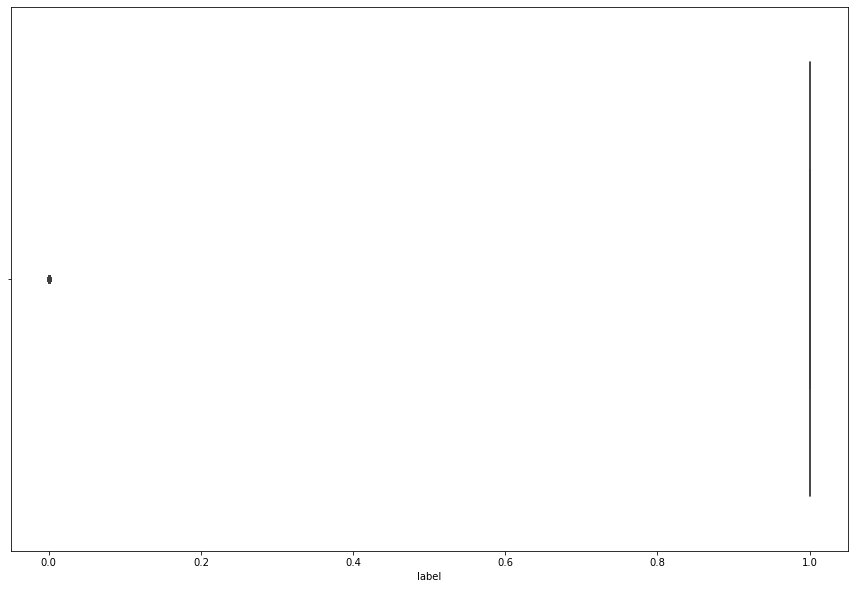



###############################################################################################################################


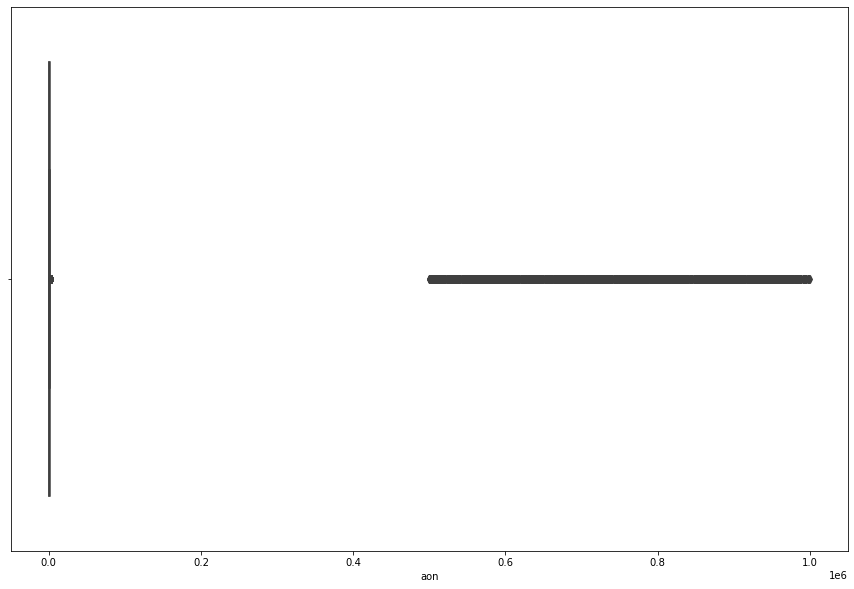



###############################################################################################################################


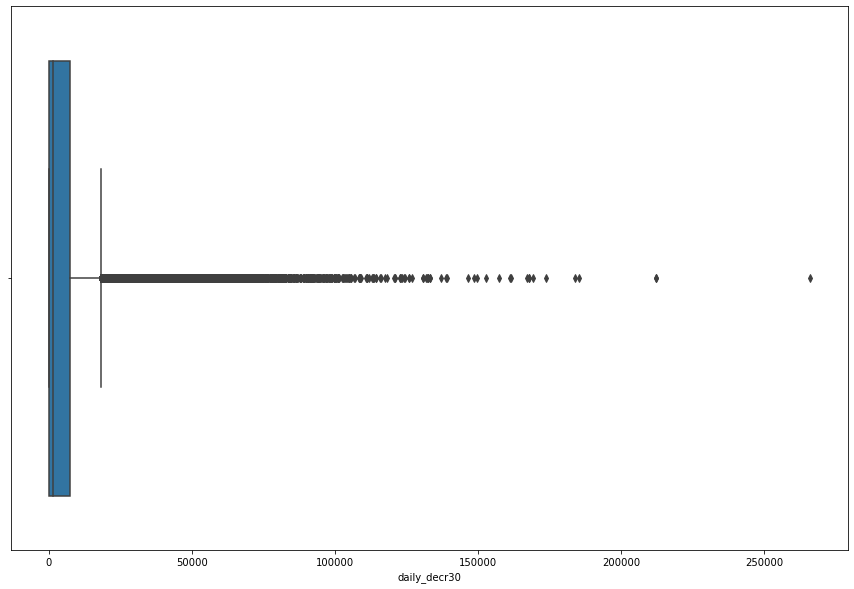



###############################################################################################################################


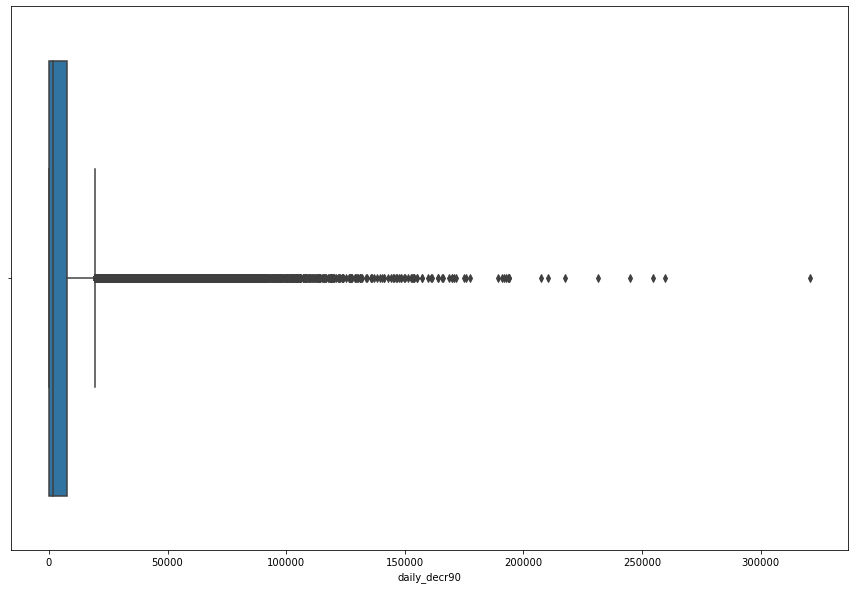



###############################################################################################################################


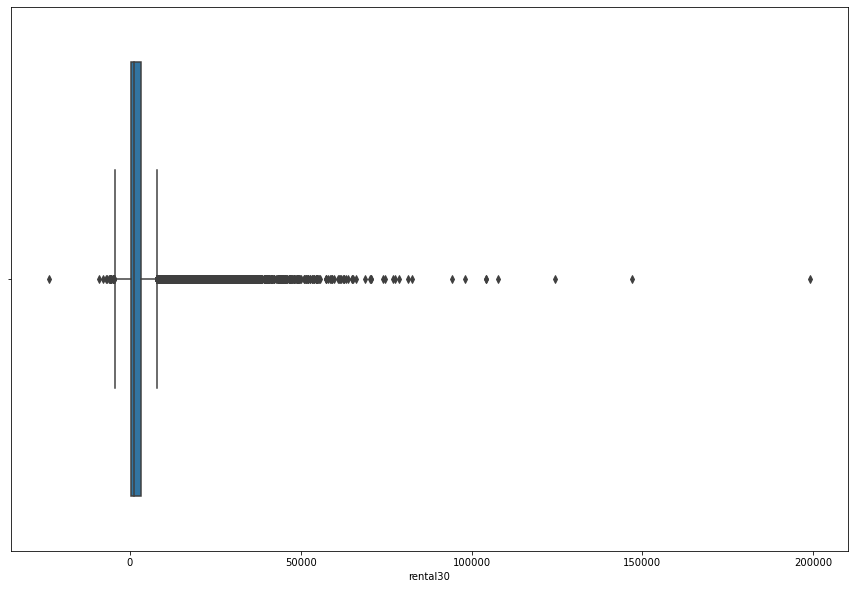



###############################################################################################################################


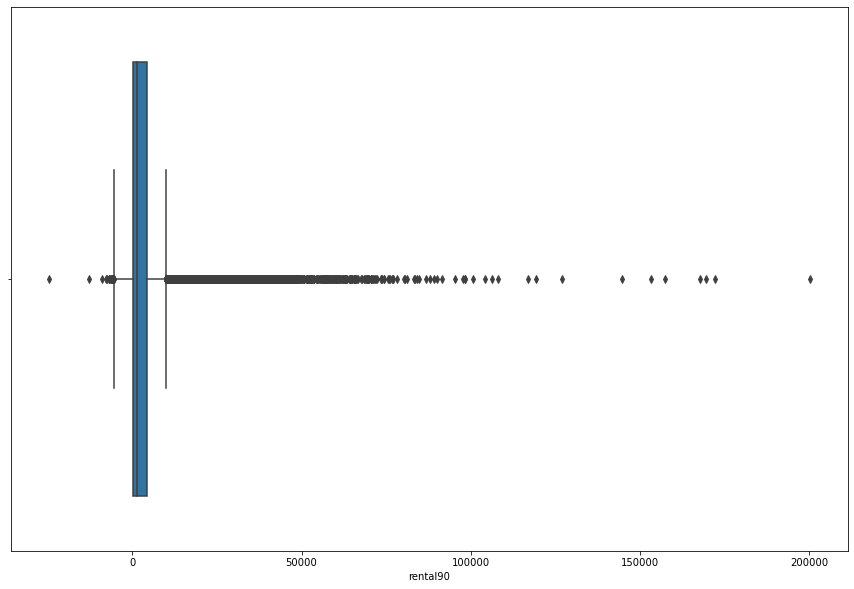



###############################################################################################################################


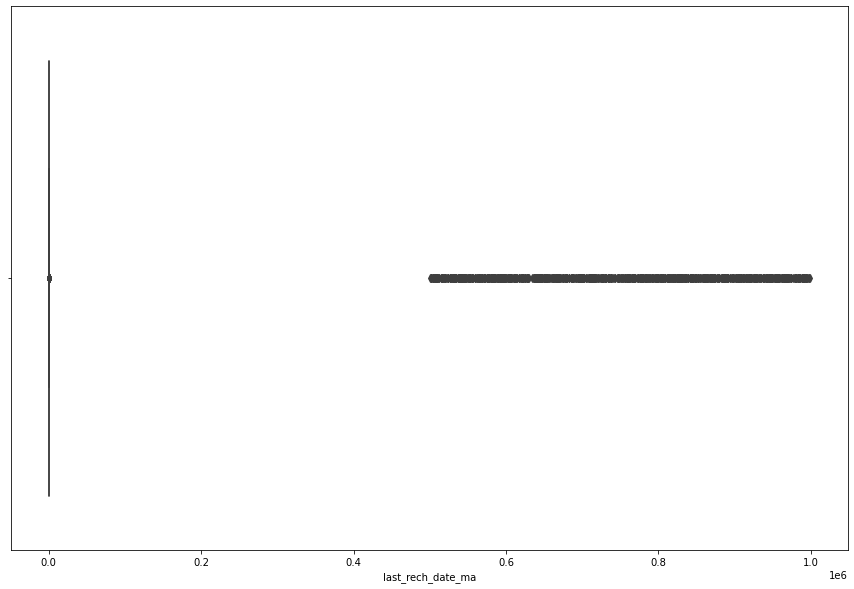



###############################################################################################################################


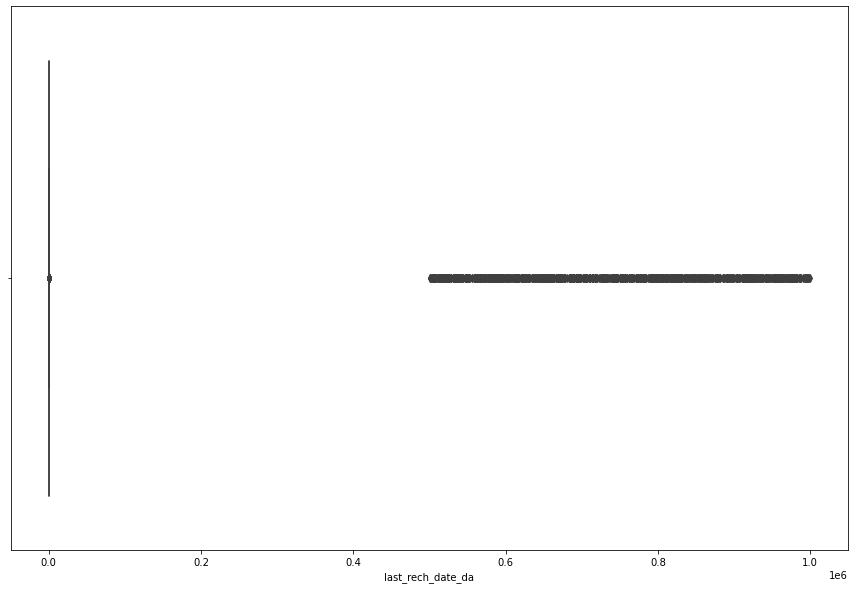



###############################################################################################################################


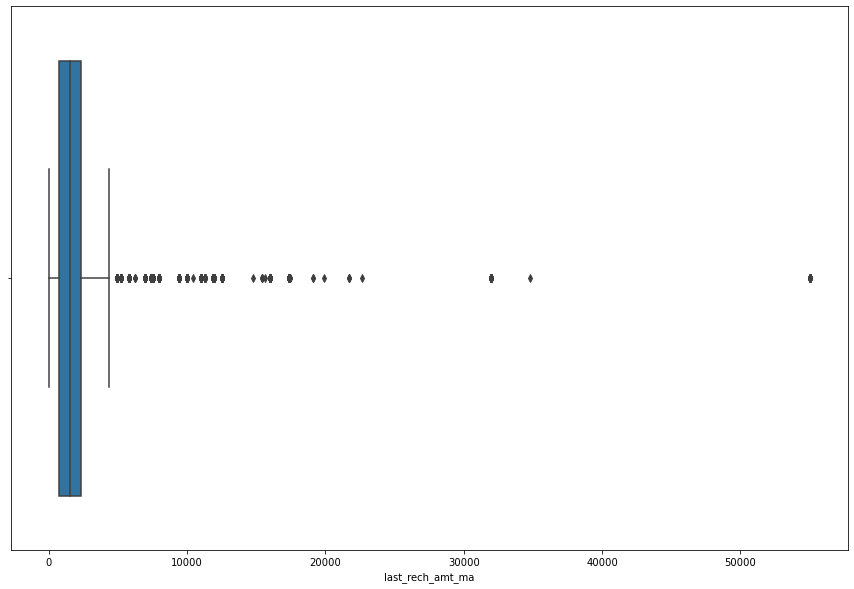



###############################################################################################################################


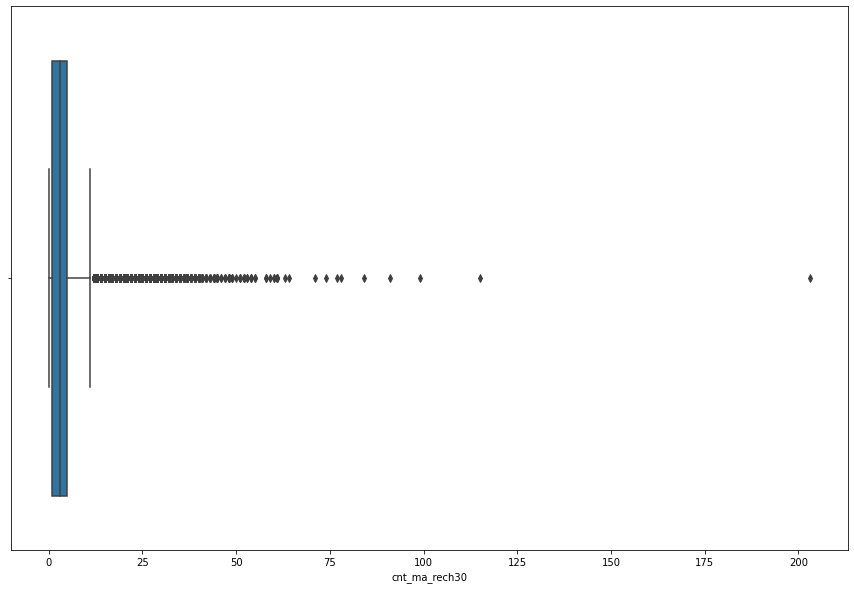



###############################################################################################################################


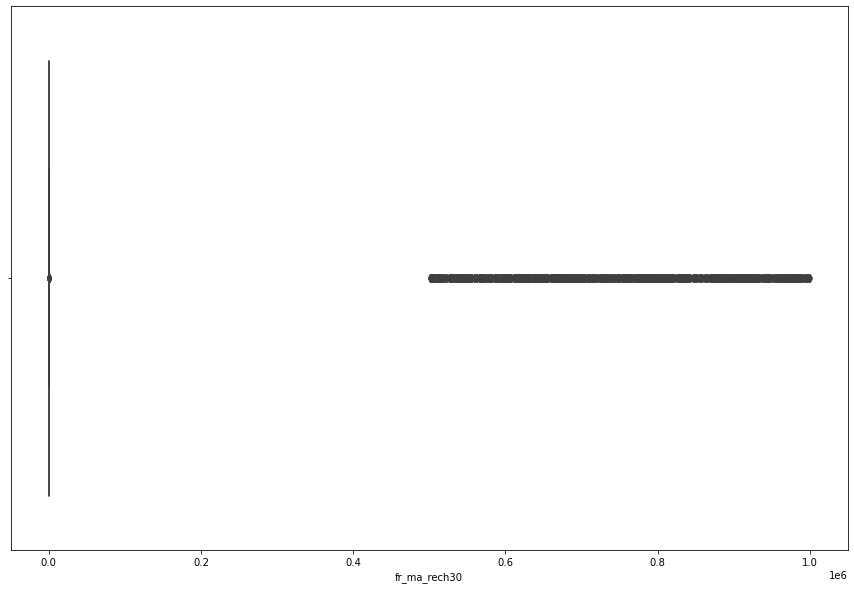



###############################################################################################################################


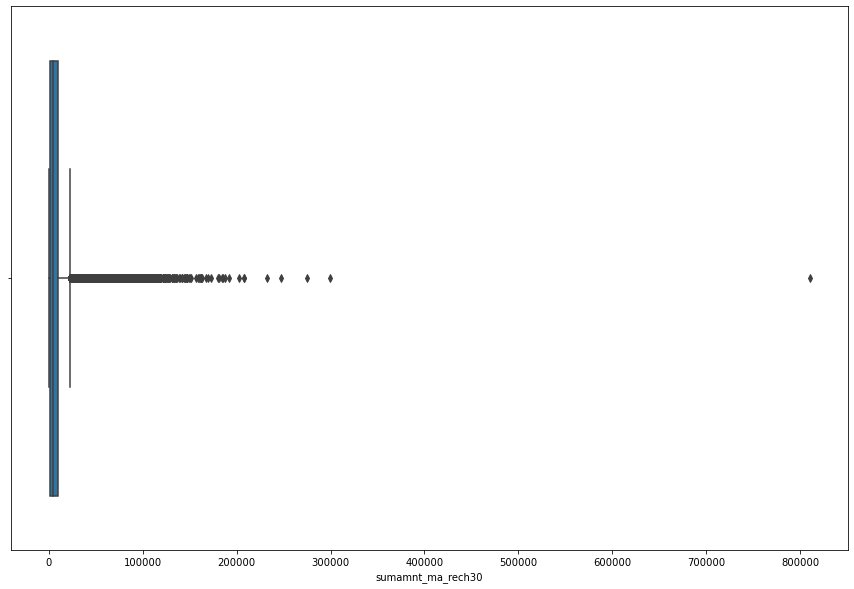



###############################################################################################################################


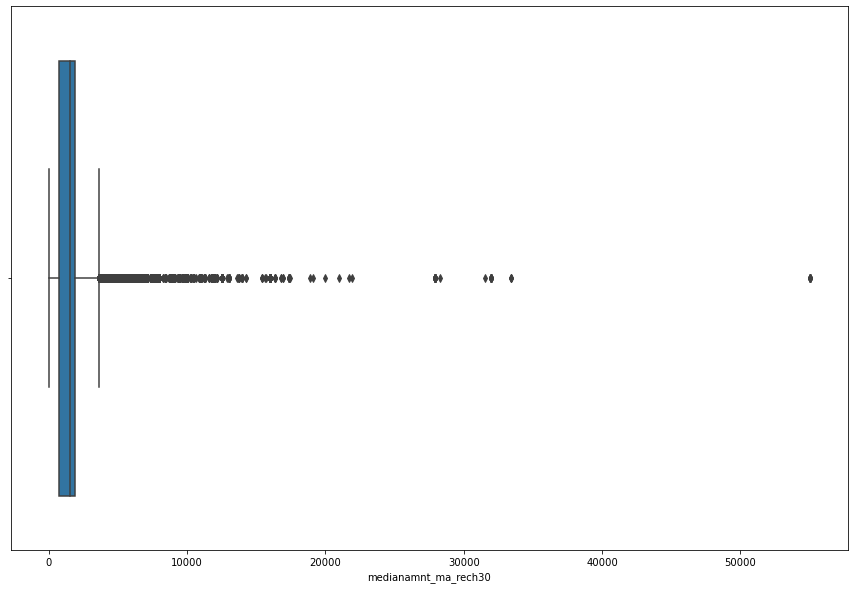



###############################################################################################################################


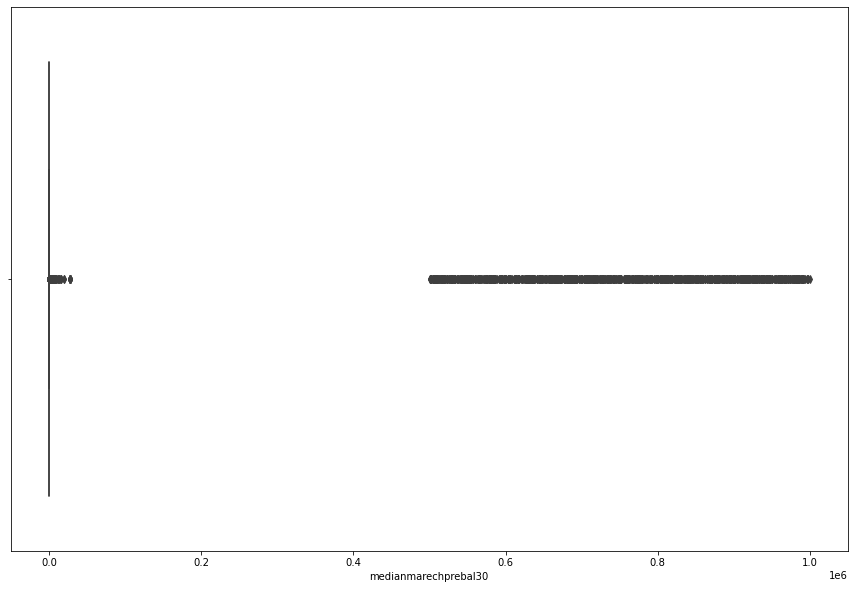



###############################################################################################################################


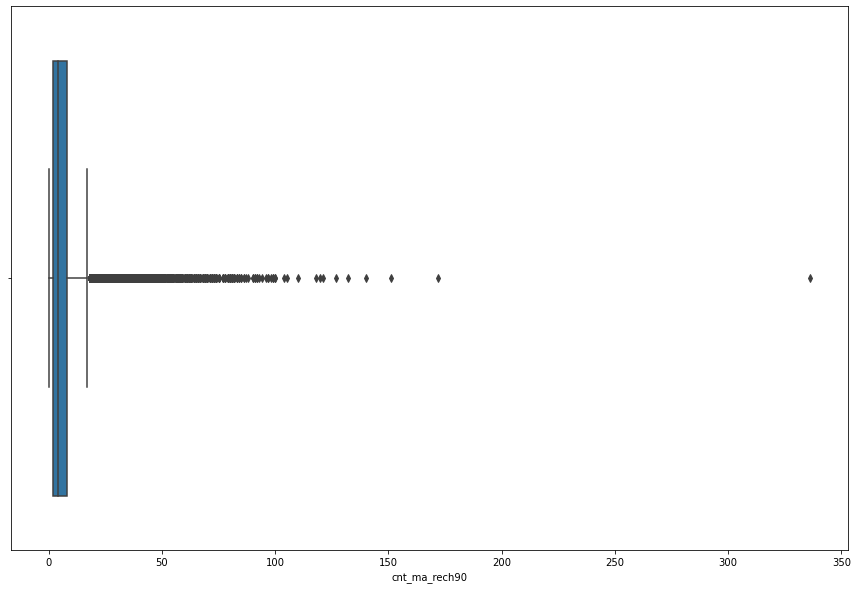



###############################################################################################################################


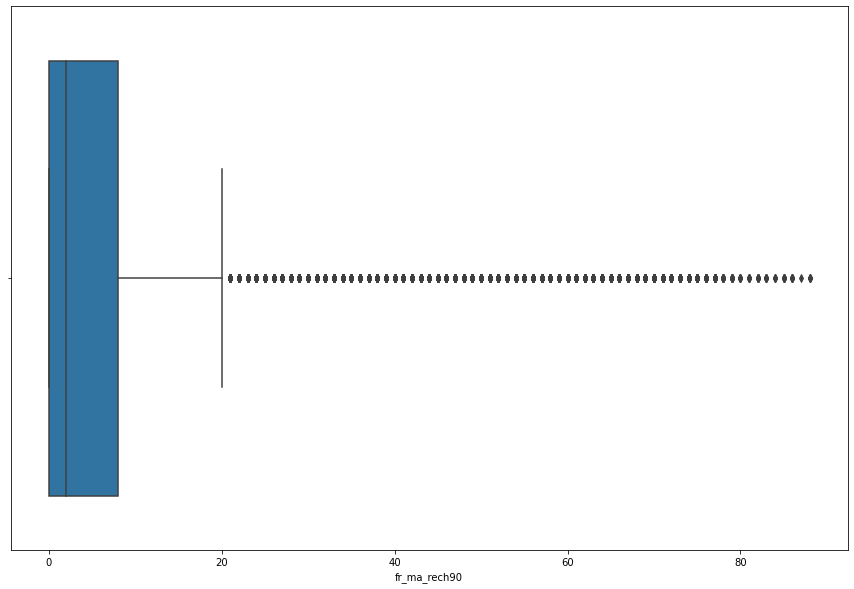



###############################################################################################################################


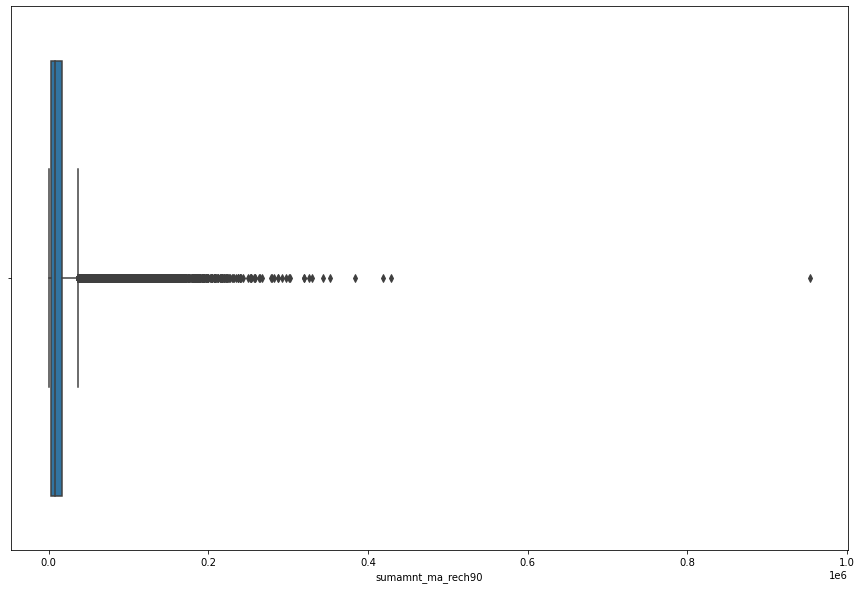



###############################################################################################################################


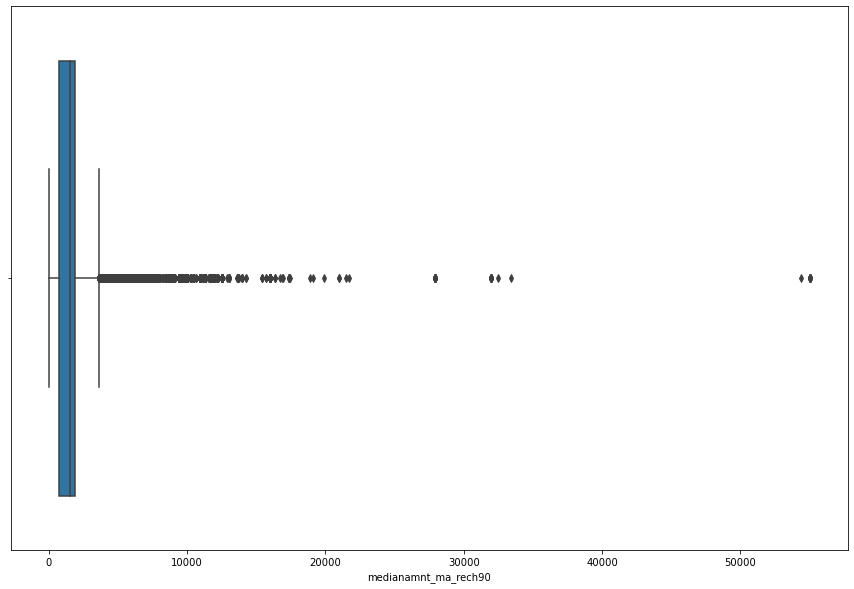



###############################################################################################################################


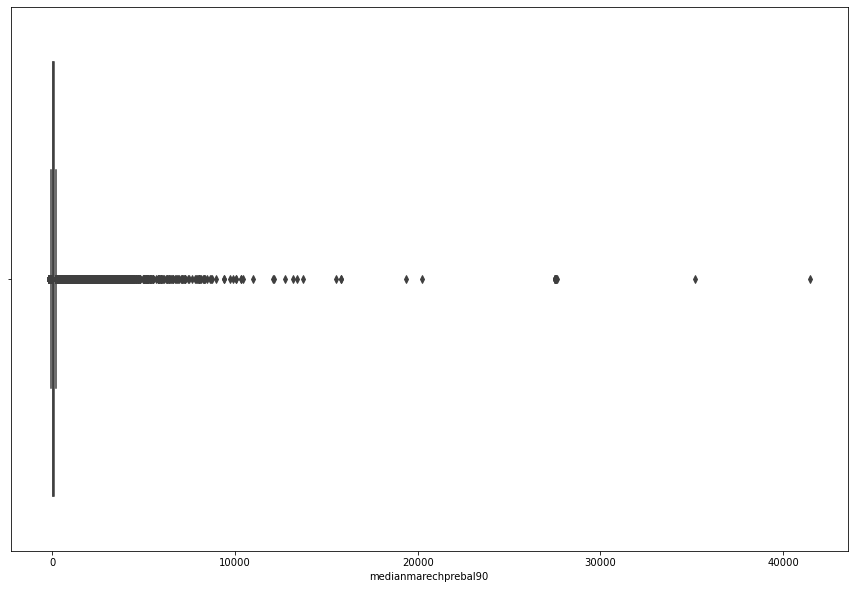



###############################################################################################################################


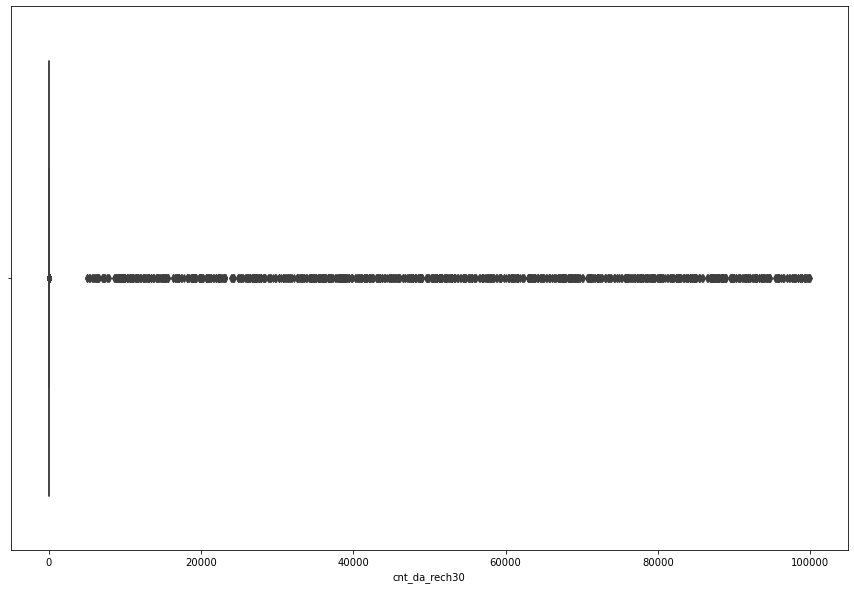



###############################################################################################################################


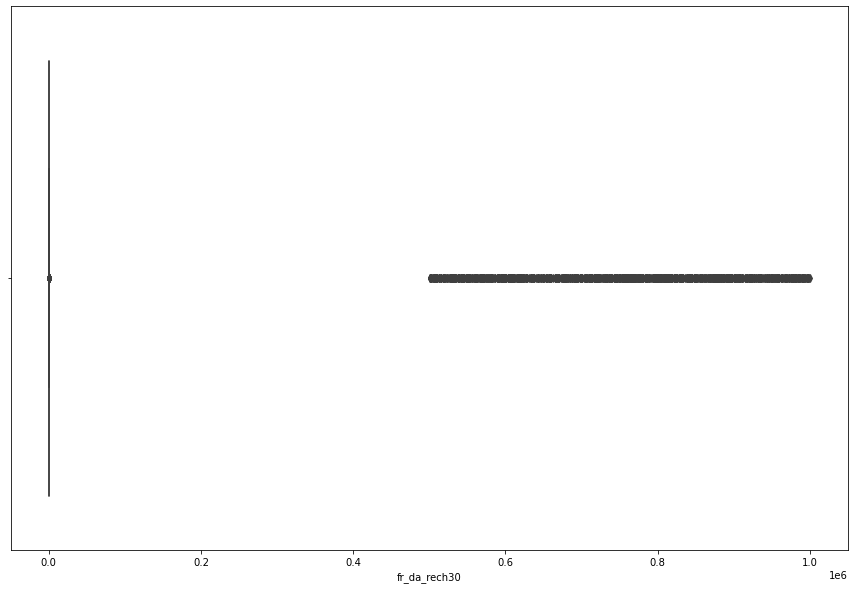



###############################################################################################################################


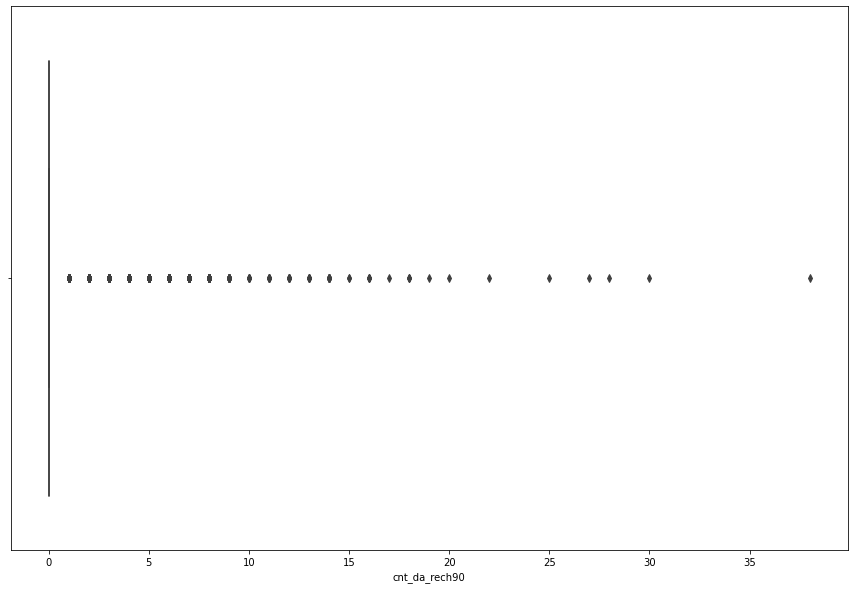



###############################################################################################################################


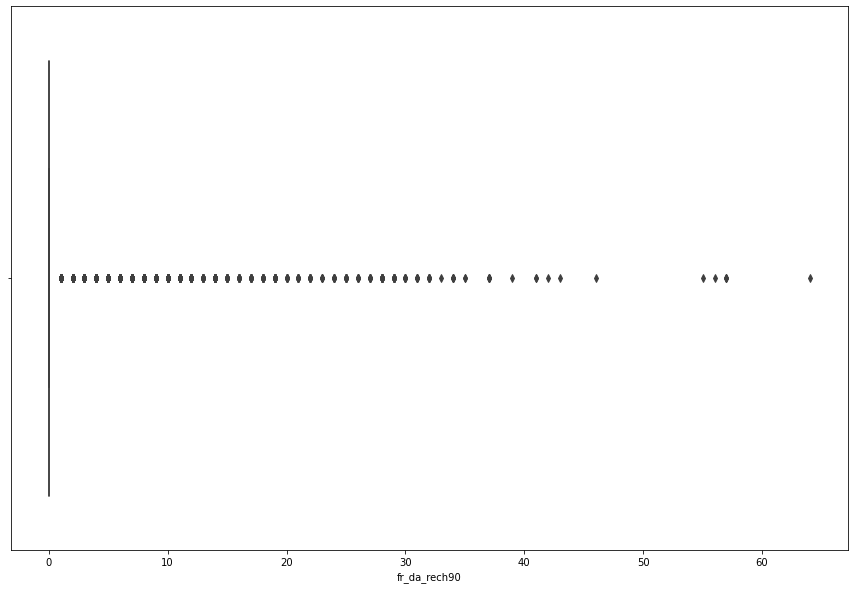



###############################################################################################################################


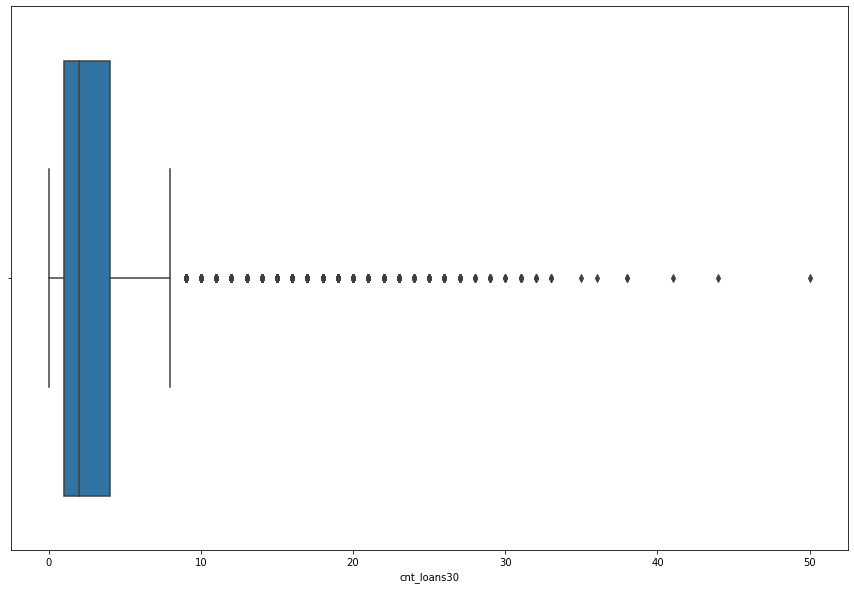



###############################################################################################################################


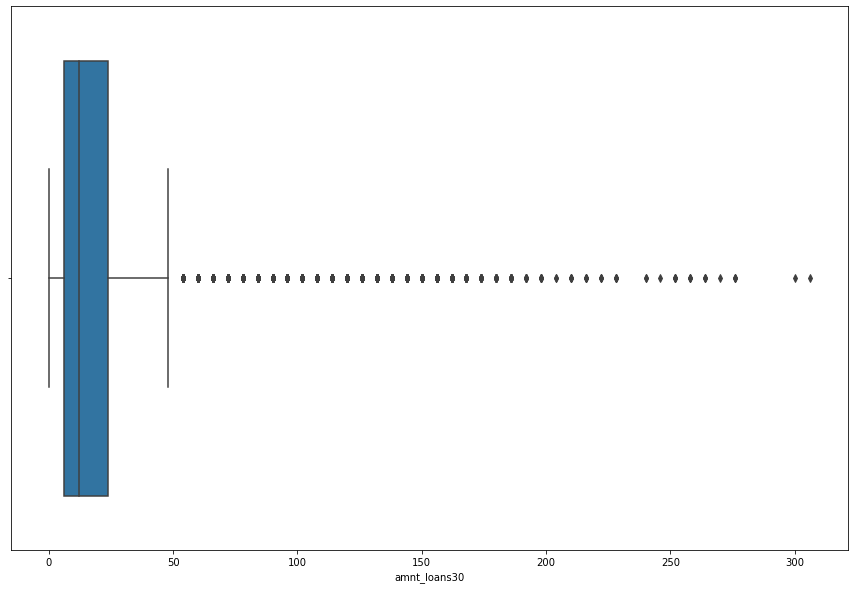



###############################################################################################################################


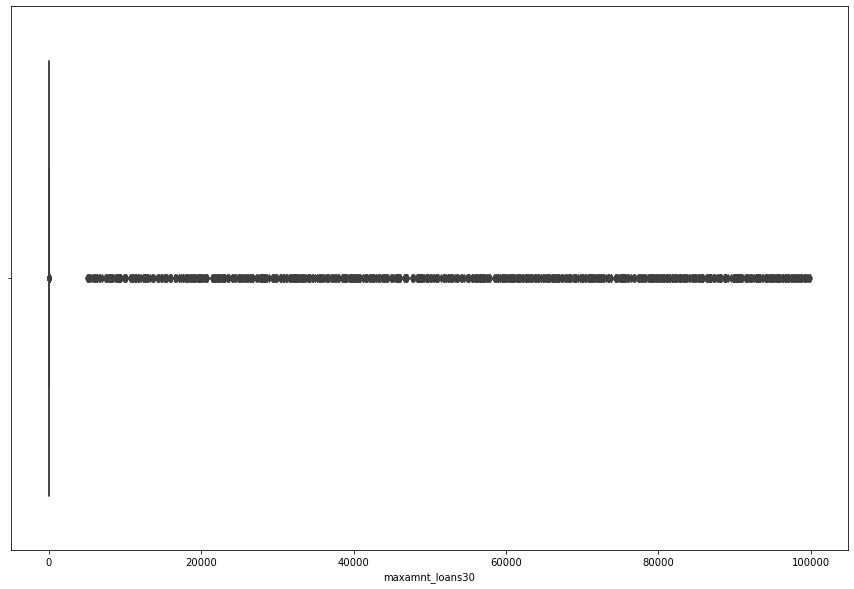



###############################################################################################################################


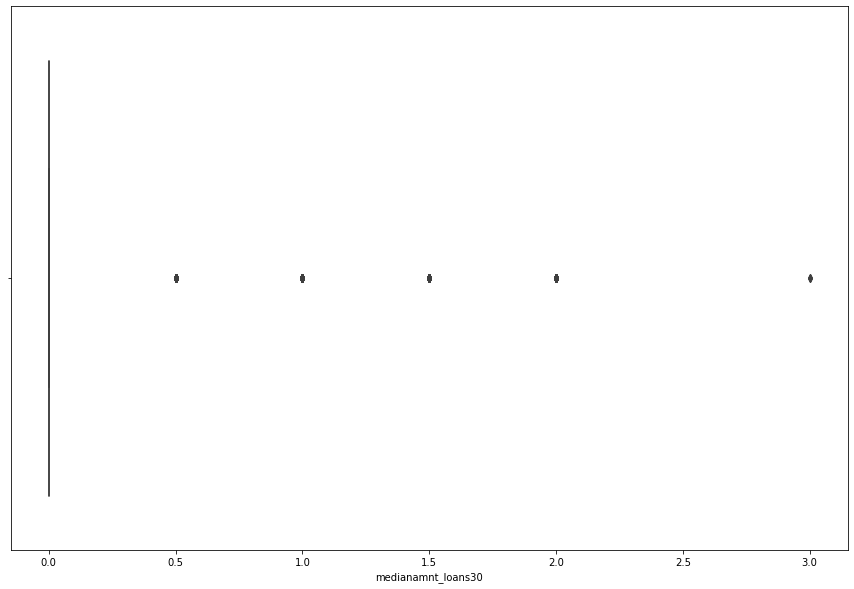



###############################################################################################################################


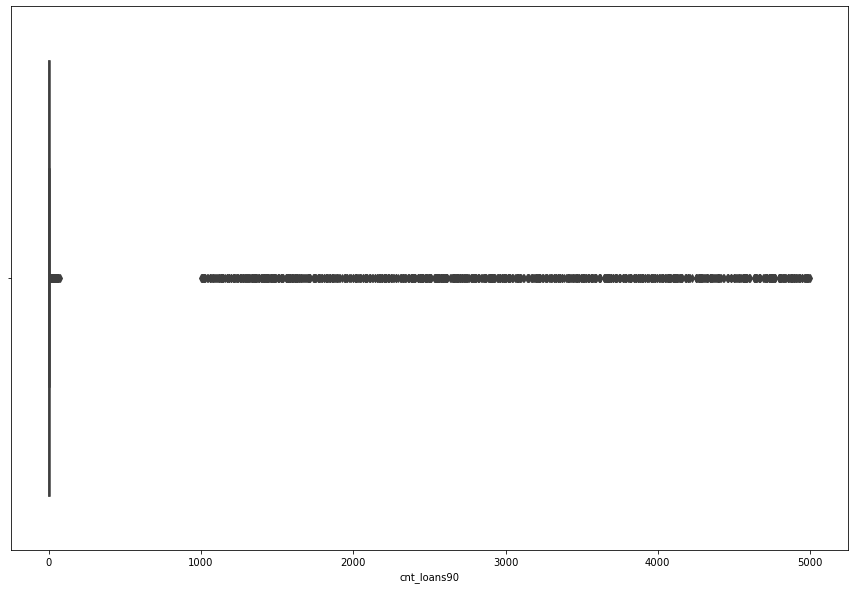



###############################################################################################################################


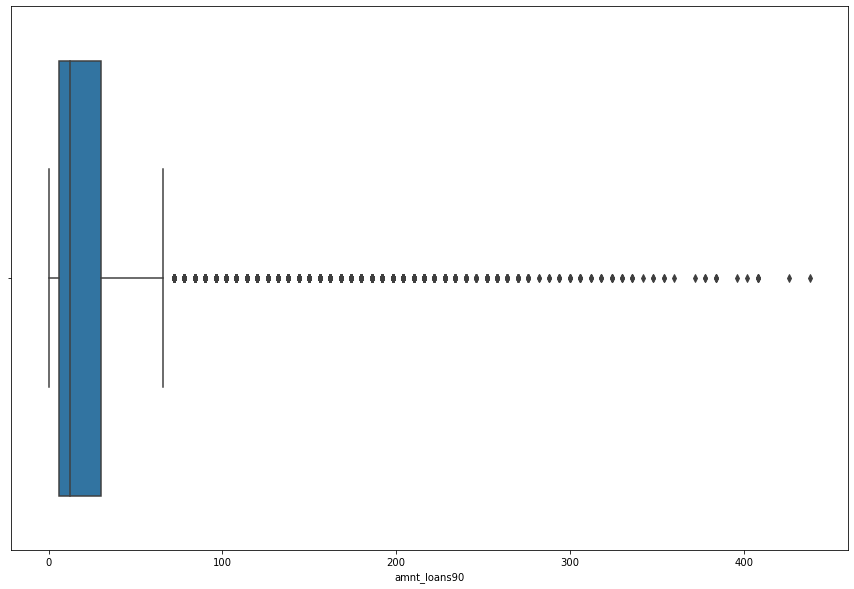



###############################################################################################################################


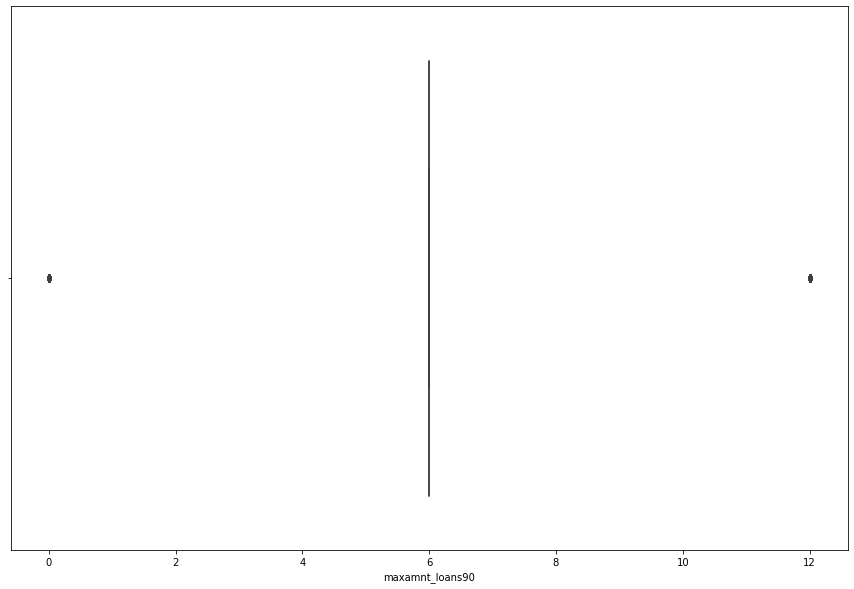



###############################################################################################################################


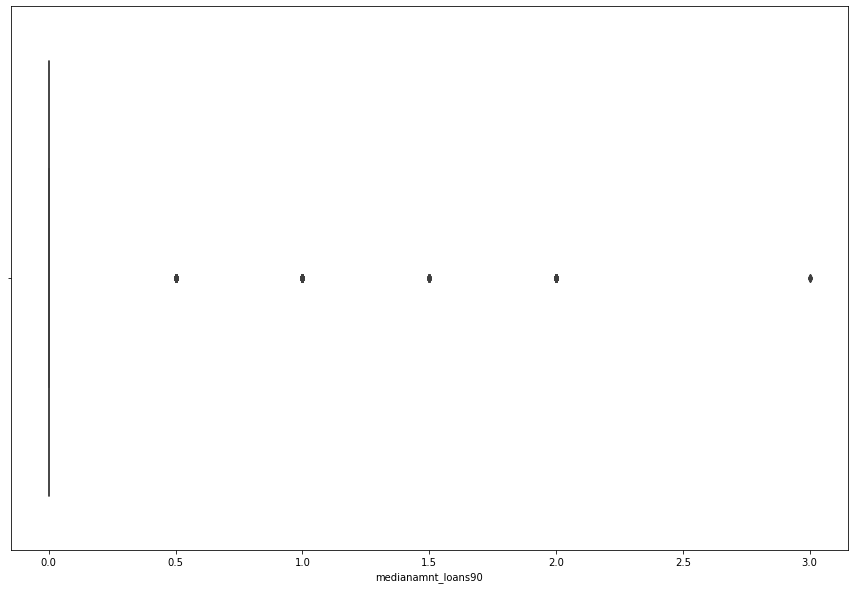



###############################################################################################################################


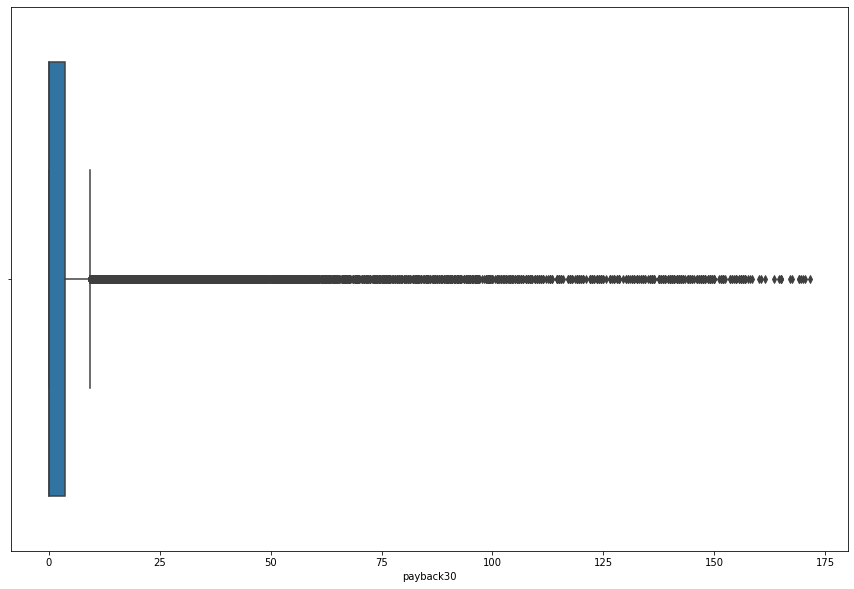



###############################################################################################################################


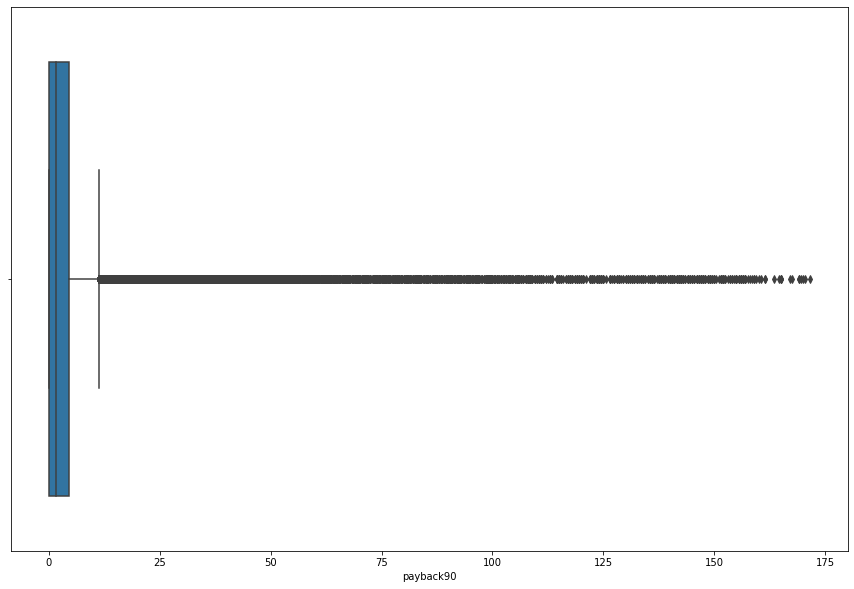



###############################################################################################################################


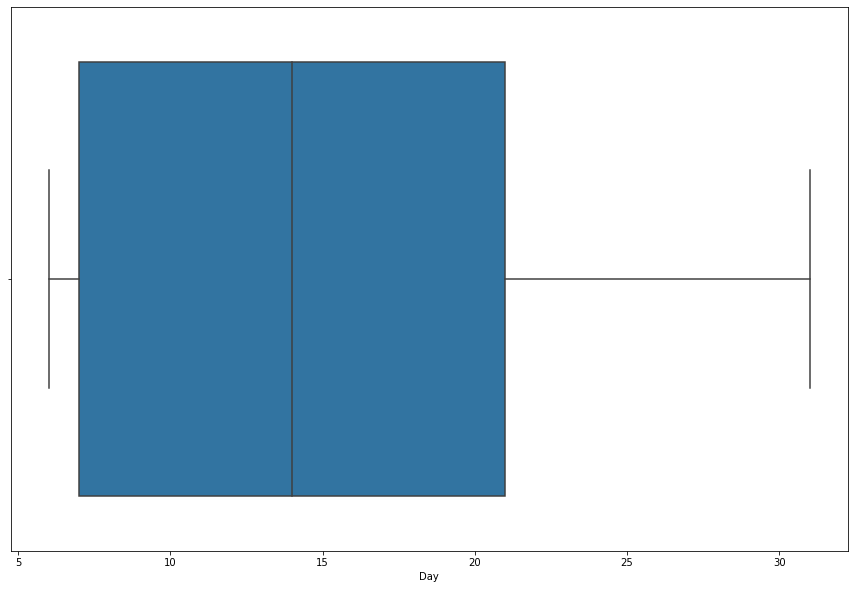



###############################################################################################################################


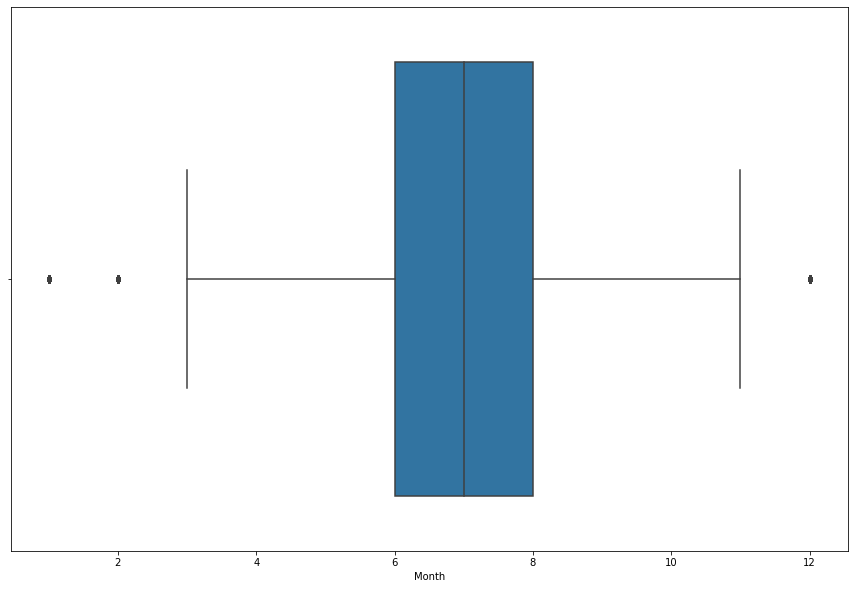



###############################################################################################################################


In [57]:
#Box plot of all Numerical Column
list_o=['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90', 'Day', 'Month']
for i in list_o:
    plt.figure(figsize=(15,10))
    sns.boxplot(df[i])
    plt.show()
    print('\n')
    print("#"*127)

Most of the columns contains outliers.Now we remove this outliers by zscore method

In [58]:
len(list_o)

35

# Remove The Outliers From The DataFrame By Zscore:

In [59]:
#import zscore
from scipy.stats import zscore

In [67]:
outliers_columns=df[['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']]

In [68]:
z=np.abs(zscore(outliers_columns))
z

array([[2.64789583, 0.10357685, 0.25229941, ..., 0.22959366, 2.9046997 ,
        2.39409346],
       [0.37765836, 0.09776412, 0.73103667, ..., 0.22959366, 0.38562959,
        0.41923266],
       [0.37765836, 0.10010243, 0.43201111, ..., 0.22959366, 0.38562959,
        0.41923266],
       ...,
       [0.37765836, 0.09378769, 0.70079045, ..., 0.22959366, 0.06820893,
        0.04735622],
       [0.37765836, 0.08428915, 0.77075515, ..., 0.22959366, 0.38562959,
        0.59938541],
       [0.37765836, 0.08628398, 0.09674426, ..., 0.22959366, 0.38562959,
        0.41923266]])

In [69]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([15, 15, 32, ..., 28, 26, 30], dtype=int64))


In [74]:
df_new=df[(z<3).all(axis=1)]
df_new

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,17,6
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,6,12
209590,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,29,7
209591,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,25,7


we remove all outliers from the dataset

# LabelEncoding:

In [75]:
#checking unique value in the dataframe

In [76]:
df_new.nunique().to_frame('unique values')

,unique values
label,2
msisdn,147472
aon,2398
daily_decr30,114243
daily_decr90,118757
rental30,100925
rental90,105815
last_rech_date_ma,131
last_rech_date_da,123
last_rech_amt_ma,47


In [77]:
# checking for categorical columns
categorical_columns=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['msisdn']


In [ ]:
Since the 'msisdn' column represents only the customer's phone number, we omit this column. Then we will have no categorical column for label encoding.

In [78]:
df_new=df_new.drop('msisdn',axis=1)

In [79]:
df_new.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'Day', 'Month'],
      dtype='object')

In [80]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161465 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 161465 non-null  int64  
 1   aon                   161465 non-null  float64
 2   daily_decr30          161465 non-null  float64
 3   daily_decr90          161465 non-null  float64
 4   rental30              161465 non-null  float64
 5   rental90              161465 non-null  float64
 6   last_rech_date_ma     161465 non-null  float64
 7   last_rech_date_da     161465 non-null  float64
 8   last_rech_amt_ma      161465 non-null  int64  
 9   cnt_ma_rech30         161465 non-null  int64  
 10  fr_ma_rech30          161465 non-null  float64
 11  sumamnt_ma_rech30     161465 non-null  float64
 12  medianamnt_ma_rech30  161465 non-null  float64
 13  medianmarechprebal30  161465 non-null  float64
 14  cnt_ma_rech90         161465 non-null  int64  
 15  

now all the columns are numerical type and no null values are in the dataframe

# Dividing data in features and vectors:

In [185]:
x=df_new.drop("label",axis=1) #Independent variable
y=df_new.iloc[:,0] #Dependent variable

In [186]:
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,17,6
209589,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,6,12
209590,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,29,7
209591,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,25,7


In [187]:
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 161465, dtype: int64

# Checking VIF score:

In [134]:
# checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90', 'Day', 'Month']


In [135]:
len(numerical_columns)

35

In [136]:
p=x[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90', 'Day', 'Month']]

In [137]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#define a function to calculate VIF score
def vif_clac():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(p.values,i) for i in range(p.shape[1])]
    vif["features"]=p.columns
    print(vif)

In [138]:
#checking VIF score
vif_clac()

     VIF Factor              features
0      2.703185                   aon
1     46.455340          daily_decr30
2     50.697328          daily_decr90
3     18.866583              rental30
4     20.307365              rental90
5      1.922710     last_rech_date_ma
6      1.982639     last_rech_date_da
7      7.244599      last_rech_amt_ma
8     31.873048         cnt_ma_rech30
9      1.997357          fr_ma_rech30
10    23.813029     sumamnt_ma_rech30
11    12.031988  medianamnt_ma_rech30
12     2.489530  medianmarechprebal30
13    33.049757         cnt_ma_rech90
14     1.759701          fr_ma_rech90
15    25.268040     sumamnt_ma_rech90
16    12.526505  medianamnt_ma_rech90
17     2.735876  medianmarechprebal90
18     1.000570         cnt_da_rech30
19          NaN          fr_da_rech30
20     1.990988         cnt_da_rech90
21          NaN          fr_da_rech90
22  1712.943909           cnt_loans30
23  1883.197888          amnt_loans30
24     1.002966       maxamnt_loans30
25     3.071

we can see that VIF score of amnt_loans90 column is very high.So we drop this column for geting best accuracy score from our model.  

In [139]:
p=p.drop("amnt_loans90",axis=1)

In [140]:
#checking VIF score
vif_clac()

    VIF Factor              features
0     2.702835                   aon
1    44.411523          daily_decr30
2    48.490138          daily_decr90
3    18.866542              rental30
4    20.307329              rental90
5     1.922709     last_rech_date_ma
6     1.982639     last_rech_date_da
7     7.244527      last_rech_amt_ma
8    31.869217         cnt_ma_rech30
9     1.997327          fr_ma_rech30
10   23.812739     sumamnt_ma_rech30
11   12.029951  medianamnt_ma_rech30
12    2.489444  medianmarechprebal30
13   33.037749         cnt_ma_rech90
14    1.759649          fr_ma_rech90
15   25.262285     sumamnt_ma_rech90
16   12.521514  medianamnt_ma_rech90
17    2.735876  medianmarechprebal90
18    1.000570         cnt_da_rech30
19         NaN          fr_da_rech30
20    1.990988         cnt_da_rech90
21         NaN          fr_da_rech90
22  101.202400           cnt_loans30
23   90.834784          amnt_loans30
24    1.002963       maxamnt_loans30
25    3.071282    medianamnt_loans30
2

we can see that VIF score of cnt_loans30 column is very high.So we drop this column for geting best accuracy score from our model.  

In [141]:
p=p.drop("cnt_loans30",axis=1)

In [142]:
#checking VIF score
vif_clac()

    VIF Factor              features
0     2.657531                   aon
1    44.393728          daily_decr30
2    48.238493          daily_decr90
3    18.805334              rental30
4    20.215192              rental90
5     1.901414     last_rech_date_ma
6     1.982208     last_rech_date_da
7     7.244303      last_rech_amt_ma
8    30.009012         cnt_ma_rech30
9     1.995606          fr_ma_rech30
10   23.772211     sumamnt_ma_rech30
11   12.007998  medianamnt_ma_rech30
12    2.489192  medianmarechprebal30
13   32.354878         cnt_ma_rech90
14    1.751371          fr_ma_rech90
15   25.262269     sumamnt_ma_rech90
16   12.514360  medianamnt_ma_rech90
17    2.735293  medianmarechprebal90
18    1.000565         cnt_da_rech30
19         NaN          fr_da_rech30
20    1.990685         cnt_da_rech90
21         NaN          fr_da_rech90
22   18.054613          amnt_loans30
23    1.002946       maxamnt_loans30
24    3.068067    medianamnt_loans30
25   15.879694           cnt_loans90
2

we can see that VIF score of daily_decr90 column is very high.So we drop this column for geting best accuracy score from our model.  

In [143]:
p=p.drop("daily_decr90",axis=1)

In [144]:
#checking VIF score
vif_clac()

    VIF Factor              features
0     2.657373                   aon
1     3.664023          daily_decr30
2    17.411053              rental30
3    18.667599              rental90
4     1.900057     last_rech_date_ma
5     1.981953     last_rech_date_da
6     7.244286      last_rech_amt_ma
7    29.996058         cnt_ma_rech30
8     1.994637          fr_ma_rech30
9    22.851998     sumamnt_ma_rech30
10   11.998379  medianamnt_ma_rech30
11    2.489192  medianmarechprebal30
12   32.351551         cnt_ma_rech90
13    1.748622          fr_ma_rech90
14   23.861250     sumamnt_ma_rech90
15   12.507537  medianamnt_ma_rech90
16    2.734947  medianmarechprebal90
17    1.000564         cnt_da_rech30
18         NaN          fr_da_rech30
19    1.990684         cnt_da_rech90
20         NaN          fr_da_rech90
21   17.770593          amnt_loans30
22    1.002942       maxamnt_loans30
23    3.068006    medianamnt_loans30
24   15.646134           cnt_loans90
25   11.974994       maxamnt_loans90
2

we can see that VIF score of cnt_ma_rech90 column is very high.So we drop this column for geting best accuracy score from our model.  

In [145]:
p=p.drop("cnt_ma_rech90",axis=1)

In [146]:
#checking VIF score
vif_clac()

    VIF Factor              features
0     2.653577                   aon
1     3.650413          daily_decr30
2    17.296961              rental30
3    18.493741              rental90
4     1.870683     last_rech_date_ma
5     1.980959     last_rech_date_da
6     7.233287      last_rech_amt_ma
7     8.976639         cnt_ma_rech30
8     1.990915          fr_ma_rech30
9    16.252460     sumamnt_ma_rech30
10   11.643534  medianamnt_ma_rech30
11    2.486477  medianmarechprebal30
12    1.746858          fr_ma_rech90
13   13.660258     sumamnt_ma_rech90
14   11.510430  medianamnt_ma_rech90
15    2.732254  medianmarechprebal90
16    1.000562         cnt_da_rech30
17         NaN          fr_da_rech30
18    1.989479         cnt_da_rech90
19         NaN          fr_da_rech90
20   15.889444          amnt_loans30
21    1.002942       maxamnt_loans30
22    3.067708    medianamnt_loans30
23   12.645960           cnt_loans90
24   11.813806       maxamnt_loans90
25    3.042256    medianamnt_loans90
2

we can see that VIF score of rental90 column is very high.So we drop this column for geting best accuracy score from our model.  

In [147]:
p=p.drop("rental90",axis=1)

In [148]:
#checking VIF score
vif_clac()

    VIF Factor              features
0     2.652800                   aon
1     3.623072          daily_decr30
2     1.963834              rental30
3     1.869779     last_rech_date_ma
4     1.980614     last_rech_date_da
5     7.233158      last_rech_amt_ma
6     8.974679         cnt_ma_rech30
7     1.989798          fr_ma_rech30
8    15.911698     sumamnt_ma_rech30
9    11.637862  medianamnt_ma_rech30
10    2.486270  medianmarechprebal30
11    1.745620          fr_ma_rech90
12   13.271572     sumamnt_ma_rech90
13   11.490032  medianamnt_ma_rech90
14    2.731887  medianmarechprebal90
15    1.000561         cnt_da_rech30
16         NaN          fr_da_rech30
17    1.989177         cnt_da_rech90
18         NaN          fr_da_rech90
19   15.666803          amnt_loans30
20    1.002939       maxamnt_loans30
21    3.067679    medianamnt_loans30
22   12.459126           cnt_loans90
23   11.740815       maxamnt_loans90
24    3.042171    medianamnt_loans90
25    3.996685             payback30
2

The VIF score of all columns are below 15 after droping 5 columns.                                                              

In [188]:
x=x.drop(["rental90","cnt_ma_rech90","daily_decr90","cnt_loans30","amnt_loans90"],axis=1)

In [150]:
x.head()

,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
0,272.0,3055.050000,220.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,...,12,6.0,0.0,2.0,6,0.0,29.000000,29.000000,20,7
1,712.0,12122.000000,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,...,12,12.0,0.0,1.0,12,0.0,0.000000,0.000000,8,10
2,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,...,6,6.0,0.0,1.0,6,0.0,0.000000,0.000000,19,8
3,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,0.0,0.0,...,12,6.0,0.0,2.0,6,0.0,0.000000,0.000000,6,6
4,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,...,42,6.0,0.0,7.0,6,0.0,2.333333,2.333333,22,6


In [151]:
x.columns

Index(['aon', 'daily_decr30', 'rental30', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'Day', 'Month'],
      dtype='object')

# Oversampling:

In [152]:
#Since Data of the target column is imbalanced,we need oversampling

In [189]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [190]:
x,y=smt.fit_resample(x,y)

In [155]:
x.value_counts()

aon     daily_decr30  rental30  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  cnt_da_rech90  fr_da_rech90  amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90  Day  Month
53.0    0.000000      0.00      0.0                0.0                0                 0              0.0           0.0                0.0                   0.00                  0             0                  0.0                   0.00                  0.0            0.0           0              0             6             6.0              0.0                 1.0          6                0.0                 0.0        0.0        6    6        17
58.0    0.000000      0.00      0.0                0.0                0                 0       

In [156]:
y.value_counts()

0    139065
1    139065
Name: label, dtype: int64

we can see that;
number of o = number of 1                                                                                 
so the class of target column is balanced now

# Transforming data to remove skewness:

In [157]:
#we use power transformation(method= yeo-johnson) method to remove skewness of the columns

In [165]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.57659224,  0.85245874, -0.55790675, ...,  1.44449586,
         0.90389132,  0.24826438],
       [ 0.44857862,  1.55406979,  0.76877614, ..., -0.79401438,
        -0.78622959,  1.62082406],
       [ 0.09652905,  0.51547218, -0.23472473, ..., -0.79401438,
         0.80950595,  0.70417559],
       ...,
       [-0.68933804,  0.56513714,  1.0978844 , ..., -0.79401438,
         0.37321282, -0.20665509],
       [-1.05970029, -0.72555856, -0.59222636, ..., -0.79401438,
         0.49249393, -1.10896407],
       [ 1.81833033,  0.1210242 ,  1.40772143, ..., -0.79401438,
        -1.02993211, -0.65981199]])

In [166]:
#print skewness after power transform
df_new1=pd.DataFrame(x,columns=['aon', 'daily_decr30', 'rental30', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'Day', 'Month'])
df_new1.skew()

aon                     -0.140650
daily_decr30            -0.932773
rental30                -2.477107
last_rech_date_ma       -1.269226
last_rech_date_da      -28.791870
last_rech_amt_ma         0.120604
cnt_ma_rech30            0.027392
fr_ma_rech30             0.279333
sumamnt_ma_rech30       -0.026276
medianamnt_ma_rech30     0.091362
medianmarechprebal30    -0.596088
fr_ma_rech90             0.198801
sumamnt_ma_rech90        0.000845
medianamnt_ma_rech90     0.145991
medianmarechprebal90    -0.972295
cnt_da_rech30            9.663521
fr_da_rech30             0.000000
cnt_da_rech90            9.173112
fr_da_rech90             0.000000
amnt_loans30            -0.541027
maxamnt_loans30         -0.762241
medianamnt_loans30       5.567302
cnt_loans90              0.245714
maxamnt_loans90          3.161788
medianamnt_loans90       6.081508
payback30                0.645204
payback90                0.484943
Day                      0.025098
Month                   -0.004886
dtype: float64

In [167]:
import numpy as np

In [168]:
x1=x

In [169]:
s_list=['daily_decr30','last_rech_date_da','medianmarechprebal30','cnt_da_rech30','medianamnt_loans30','maxamnt_loans30']
for i in s_list:
    df_new1[i]=np.log(df_new1[i])

In [170]:
df_new1.skew()

aon                     -0.140650
daily_decr30            -1.273297
rental30                -2.477107
last_rech_date_ma       -1.269226
last_rech_date_da       -2.435363
last_rech_amt_ma         0.120604
cnt_ma_rech30            0.027392
fr_ma_rech30             0.279333
sumamnt_ma_rech30       -0.026276
medianamnt_ma_rech30     0.091362
medianmarechprebal30    -0.604035
fr_ma_rech90             0.198801
sumamnt_ma_rech90        0.000845
medianamnt_ma_rech90     0.145991
medianmarechprebal90    -0.972295
cnt_da_rech30          -53.721496
fr_da_rech30             0.000000
cnt_da_rech90            9.173112
fr_da_rech90             0.000000
amnt_loans30            -0.541027
maxamnt_loans30         -4.106029
medianamnt_loans30     -62.174954
cnt_loans90              0.245714
maxamnt_loans90          3.161788
medianamnt_loans90       6.081508
payback30                0.645204
payback90                0.484943
Day                      0.025098
Month                   -0.004886
dtype: float64


Here we can observe that we have successfully removed skewness from most of the columns, but still there is skewness present in some of the columns like, maxamnt_loans90 where skewness is as it is, skewness is reduced but still present in columns rental30 and rental90. all other scores are in ideal range of +/-0.50.
Now lets move ahead

In [171]:
#ploting distribution curve of all columns

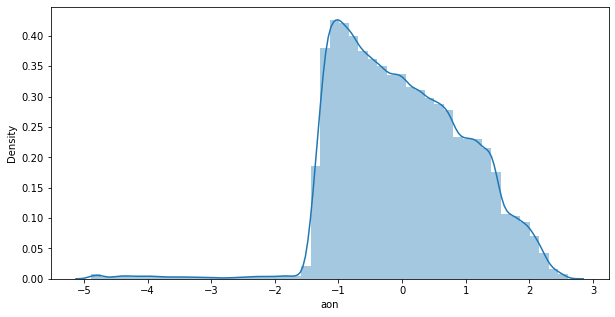

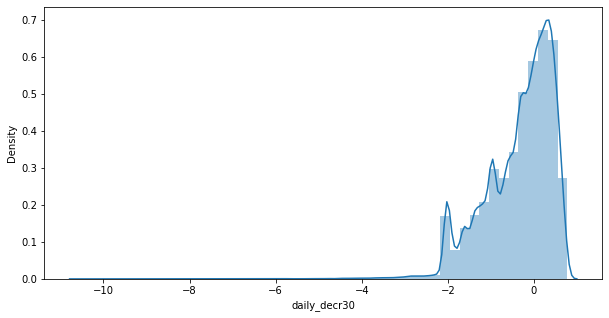

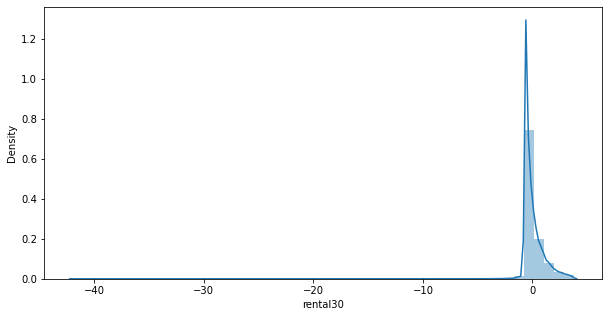

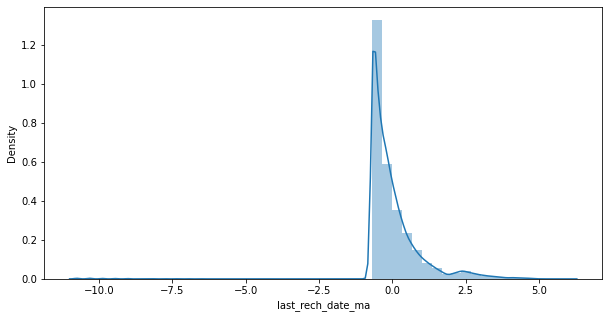

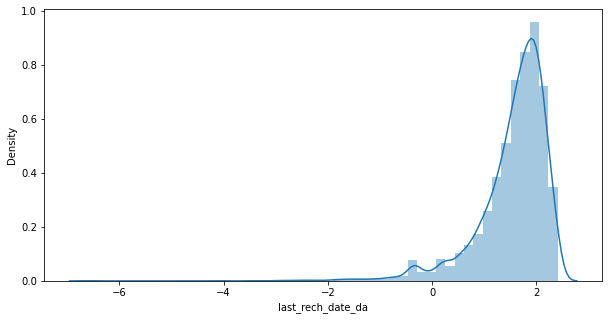

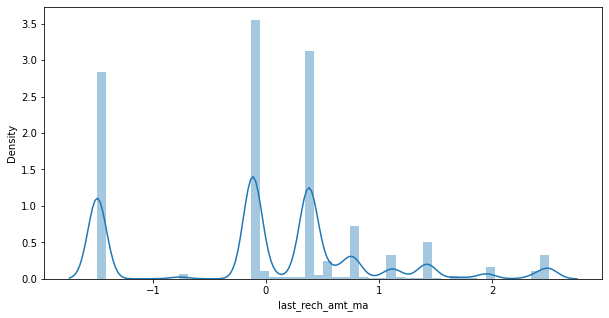

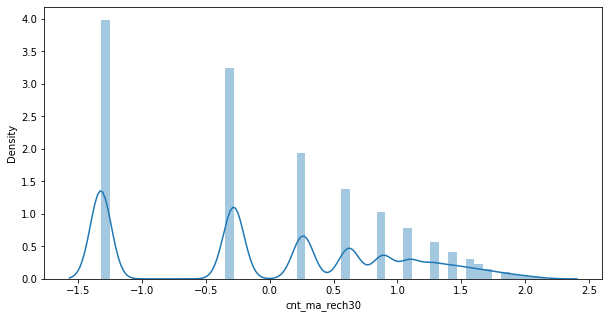

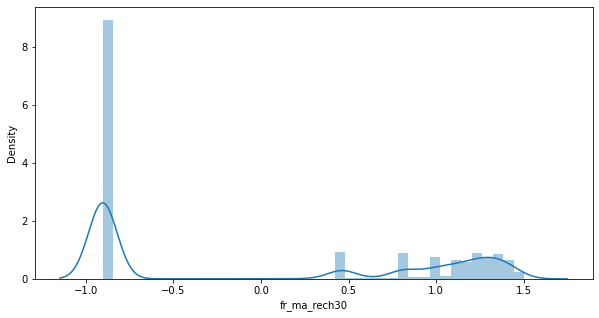

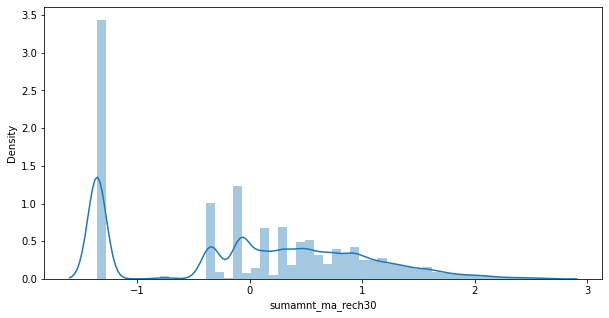

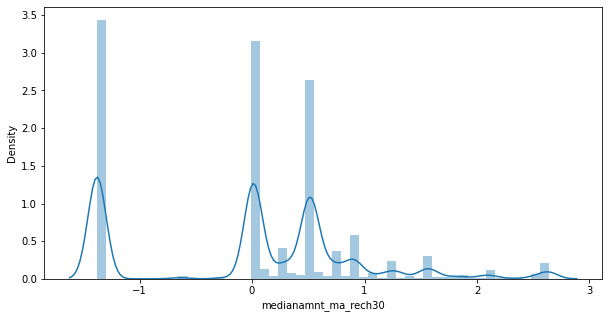

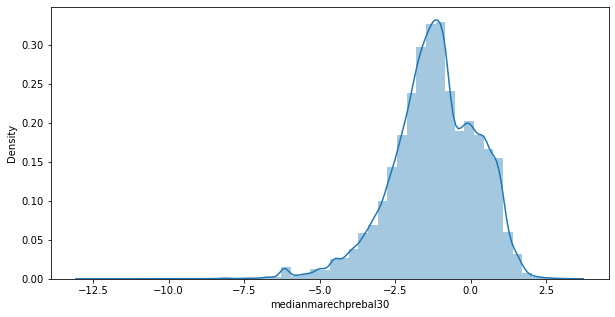

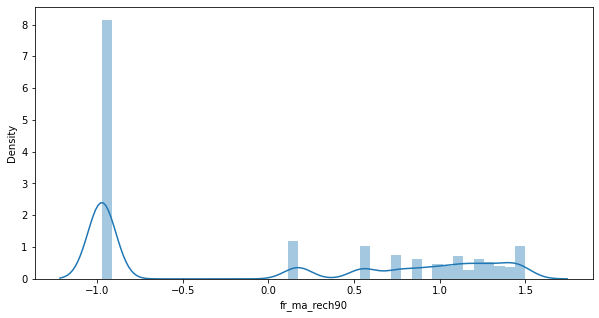

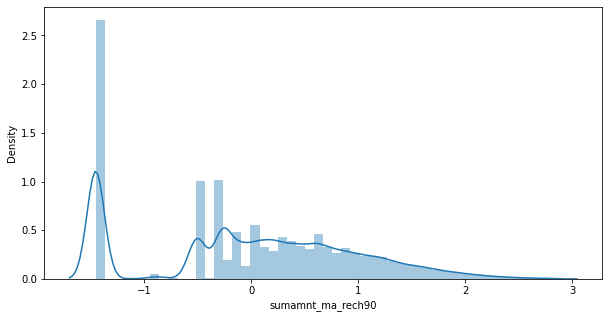

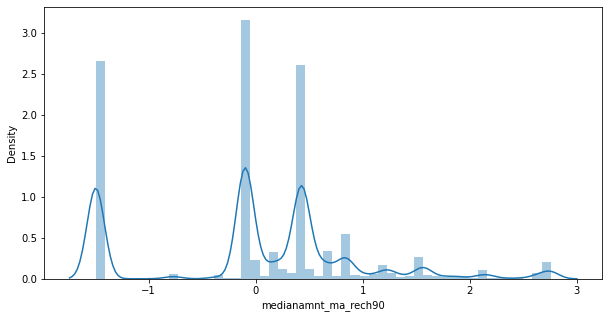

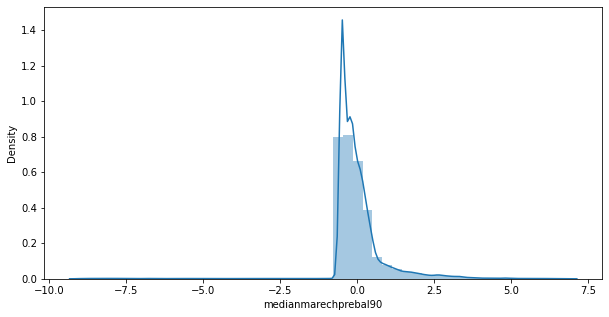

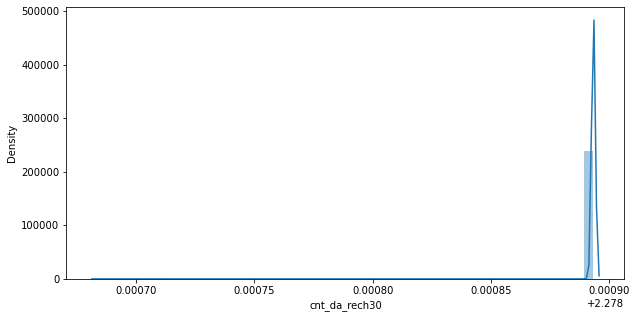

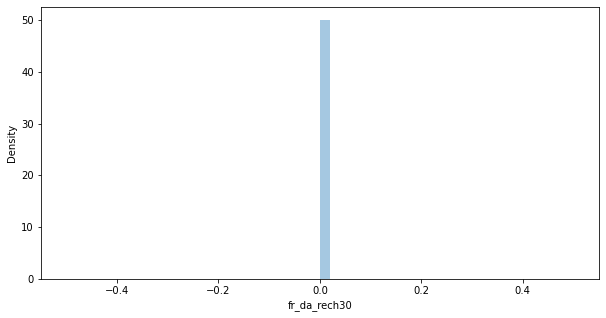

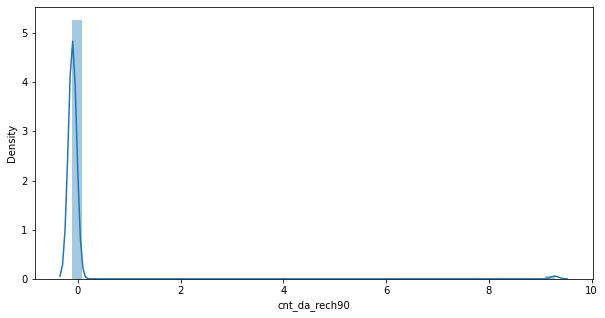

In [172]:
for i in range(18):
    plt.figure(figsize=(10,5))
    sns.distplot(df_new1[df_new1.columns[i]])    
    plt.show()

In [173]:
#standardizing the data

In [179]:
x=df_new1

In [180]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.57659224,  0.23901631, -0.55790675, ...,  1.44449586,
         0.90389132,  0.24826438],
       [ 0.44857862,  1.00077383,  0.76877614, ..., -0.79401438,
        -0.78622959,  1.62082406],
       [ 0.09652905, -0.39910319, -0.23472473, ..., -0.79401438,
         0.80950595,  0.70417559],
       ...,
       [-0.68933804, -0.28241802,  1.0978844 , ..., -0.79401438,
         0.37321282, -0.20665509],
       [-1.05970029,         nan, -0.59222636, ..., -0.79401438,
         0.49249393, -1.10896407],
       [ 1.81833033, -2.23731023,  1.40772143, ..., -0.79401438,
        -1.02993211, -0.65981199]])

Now our Data is Ready for Model Building

In [181]:
#since our output is only 0 or 1,this is a classification problem

# Model Building:

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [183]:
x.shape

(278130, 29)

In [191]:
#finding best random state
maxAccu=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy score is :",maxAccu,"on random state  ",maxRS)

Best accuracy score is : 0.7631922721988519 on random state   57


we get best random state value.Now it will be used for train test split

In [193]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxRS)

In [194]:
#chacking shape of all variables which are geting from train test split function
print("x_train shape =",x_train.shape)
print("x_test shape =",x_test.shape)
print("y_train shape =",y_train.shape)
print("y_test shape =",y_test.shape)

x_train shape = (194691, 29)
x_test shape = (83439, 29)
y_train shape = (194691,)
y_test shape = (83439,)


all shapes are correct for testing another model.

In [197]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
grb=GradientBoostingClassifier()
adb=AdaBoostClassifier()

#creat a list of all above model
model=[lg,gnb,dtc,knn,rfc,grb]

In [198]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*'*125)
    print('_'*125)
    print("\n")

Accuracy score of  LogisticRegression() is
0.7631922721988519
[[33425  8467]
 [11292 30255]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77     41892
           1       0.78      0.73      0.75     41547

    accuracy                           0.76     83439
   macro avg       0.76      0.76      0.76     83439
weighted avg       0.76      0.76      0.76     83439

*****************************************************************************************************************************
_____________________________________________________________________________________________________________________________


Accuracy score of  GaussianNB() is
0.7377245652512614
[[35614  6278]
 [15606 25941]]
              precision    recall  f1-score   support

           0       0.70      0.85      0.76     41892
           1       0.81      0.62      0.70     41547

    accuracy                           0.74     83439
   macro avg       0.75

we get best accuracy score from RandomForestClassifier

# Checking Cross Val Score:

In [201]:
from sklearn.model_selection import cross_val_score
for i in range(5,6):
    print("For CV =",i)
    for m in model:
        scr=cross_val_score(m,x,y,cv=i)
        print("cross validation score of",m,"is =",scr.mean())
    print("\n")
    print('*'*125)
    print('*'*125)
    print("\n")

For CV = 5
cross validation score of LogisticRegression() is = 0.7583755797648581
cross validation score of GaussianNB() is = 0.736745406824147
cross validation score of DecisionTreeClassifier() is = 0.8987775500665156
cross validation score of KNeighborsClassifier() is = 0.8656599431920325
cross validation score of RandomForestClassifier() is = 0.939927372092187
cross validation score of GradientBoostingClassifier() is = 0.8939021320965017


*****************************************************************************************************************************
*****************************************************************************************************************************




we can see that the difference between accuracy score and cross val score is less of RandomForestClassifier.So,we choose Random Forest classifier for Parameter Tuning.

# Parameter Tuning for RandomForestClassifier:

In [202]:
#creating parameter list to pass in GreadSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}
gcv1=GridSearchCV(RandomForestClassifier(),parameters,cv=8,scoring='accuracy')
gcv1.fit(x_train,y_train)
gcv1.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}

In [203]:
gcv1.best_score_

0.8636762684391375

In [204]:
gcv1.best_estimator_

RandomForestClassifier(max_depth=8)

# Creating Final Model:

In [205]:
final_model=gcv1.best_estimator_

In [206]:
final_model.fit(x_train,y_train)
predm1=final_model.predict(x_test)
predm2=final_model.predict(x_train)
print('Test Accuracy score of final model =',accuracy_score(y_test,predm1))
print('Train Accuracy score of final model =',accuracy_score(y_train,predm2))
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))

Test Accuracy score of final model = 0.8673162430038711
Train Accuracy score of final model = 0.8679651344951744
[[37920  3972]
 [ 4154 37393]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     41892
           1       0.90      0.90      0.90     41547

    accuracy                           0.90     83439
   macro avg       0.90      0.90      0.90     83439
weighted avg       0.90      0.90      0.90     83439



we can see that test accuravy score is very close to the test accracy score.so,our model is not underfit or overfit. so this our best model.we save this model for future prediction.

<AxesSubplot:>

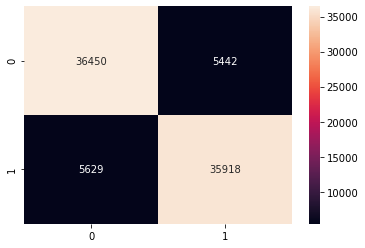

In [207]:
confusion_matrix(y_test,predm1)
sns.heatmap(confusion_matrix(y_test,predm1),annot=True, fmt='d')

# ROCAUC curve:

In [208]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.41051047, 0.89622842, 0.63251943, ..., 0.49660042, 0.41388456,
       0.24695681])

In [209]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [210]:
auc_score=roc_auc_score(y_test,final_model.predict(x_test))
print("roc_auc_score=",auc_score)

roc_auc_score= 0.8673047077715363


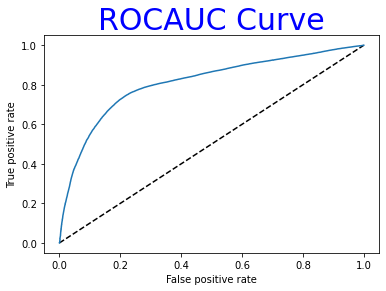

In [211]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROCAUC Curve',color='Blue',size=30)
plt.show()

In [212]:
MLdf=pd.DataFrame([final_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T
MLdf

,Predicted,Original
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
83434,1,1
83435,0,0
83436,1,1
83437,0,0


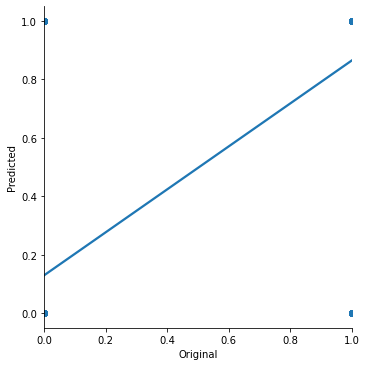

In [213]:
sns.lmplot(x='Original',y='Predicted',data=MLdf,palette='rainbow')

# Model Saving:

In [214]:
#Save the final model                                                                      
import joblib 
#joblib.dump(final_model,'Micro Credit Defaulter project Model.pkl')